# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: #FE251B"><b>Heart Failure Prediction</b><br></h1>

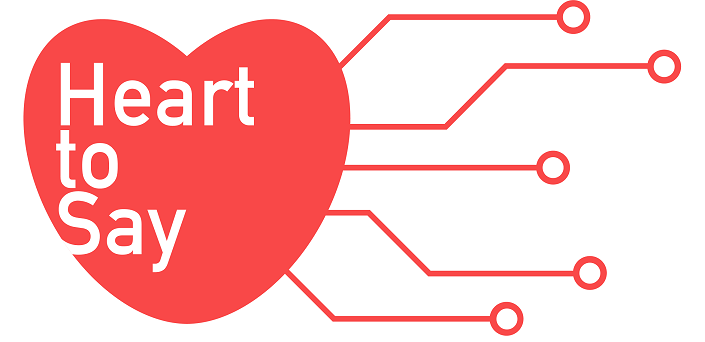

**Group A - Team members**

<ul>
    <li>Sahid Hasan Rahim</li>
    <li>Zhao Chen</li>
    <li>Ifani Pinto Nada</li>
    <li>Nan Jiang</li>
    <li>Mahmoud Elachi</li>
</ul>

### Problem Statement :

Cardiovascular disease (CVD) is the leading cause of death worldwide, with an estimated 20.5 million deaths reported in 2021 [1, 2]. Among CVD conditions, **heart failure** often presents a survival prognosis comparable to that of severe cancer types [1, 3]. Heart failure is a condition where the heart cannot pump or fill with blood properly [2]. This disease is caused by structural or functional heart issues. It is detected by high levels of specific heart-related proteins or signs of fluid buildup in the lungs or body. 

Studies indicate that elderly patients [4, 5] and men [5] face higher mortality rates in heart failure cases. Other risk factors, including smoking [5], anemia [6-9], diabetes [10-12], and hypertension [5, 13, 14], are also linked to increased mortality. 

A study conducted in Sweden, the United Kingdom, Japan, and the USA revealed that more than half of the deaths occurring after the onset of heart failure transpire outside the hospital [15]. The study also observed a substantial increase in hospital costs associated with heart failure management, highlighting the need for enhanced intervention strategies. Accurate forecasting is therefore vital, as it enables efficient time management and the timely implementation of appropriate treatment strategies to prevent mortality due to heart failure or management of the condition [15, 16]. 

The **Heart to Say** project aims to develop a prediction model to estimate the likelihood of mortality in heart failure patients, using a dataset adopted from Chicco D et al. [17, 18]. This dataset includes various features, as described under *Dataset Attributes*. It is important to note that the dataset focuses on heart failure patients in **Pakistan**, so the scope of this project involves predicting mortality due to heart failure within the Pakistani population. This is especially important since the risk of death within 30 days of the first hospital admission is 3-5 times higher in lower-income countries compared to high-income countries, even after accounting for patient differences and long-term heart failure treatment [19]. Additionally, in lower-income countries, hospitalizations were about as frequent as deaths or less frequent. Pakistan is categorized as a low-middle income country according to the Organisation for Economic Co-operation and Development [20].

### Aim :
Deliver a solution for general practitioners, cardiologists and cardiac nurses in Pakistan to:
- Predict the likelihood of mortality due to heart failure
- Display the risk factors contributing to it
- Aid the aforementioned professionals in pinpointing and addressing the biggest factors


### <center>Dataset Attributes</center>
    
    
- **Age** : age [years]

- **anaemia** : Decrease of red blood cells or hemoglobin (boolean)

- **creatinine_phosphokinase** : Level of the Creatine Phosphokinase (CPK) enzyme in the blood (mcg/L)

- **diabetes** : If the patient has diabetes(1) or not(0) (boolean)

- **ejection_fraction** : Percentage of blood leaving the heart at each contraction (percentage)

- **high_blood_pressure** : If the patient has hypertension(1) or not(0) (boolean)

- **platelets** : Platelets in the blood (kiloplatelets/mL)

- **serum_creatinine** : Level of serum creatinine in the blood (mg/dL)

- **serum_sodium** : Level of serum sodium in the blood (mEq/L)

- **sex** : Female(0) or Male(1) (binary)

- **smoking** : If the patient smokes(1) or not(0) (boolean)

- **time** : Follow-up period (days)

- **DEATH_EVENT** : If the patient died(1) before the follow-up, or not (0) (boolean)


**Discussion:** The dataset includes demographic information (age and sex), smoking status, and the presence of comorbidities such as anemia, diabetes, and hypertension, all of which are factors with strong correlation to heart failure [6-12, 21]. It also includes laboratory test data that are indicators for heart failure, including creatinine phosphokinase (CPK) levels, platelet counts, serum creatinine levels, serum sodium levels, and ejection fraction percentages [17]. Death indicates the deceased patient before any follow-up of their condition was carried out. Hence, **DEATH_EVENT** will be the binary target class for this prediction model. Feature engineering as well as preprocessing of the dataset will be conducted before using it for prediction modeling.


### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA & Comparison with Domain Information
- Feature Engineering (Data Balancing)
- Modeling
- Conclusion

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [112]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/heart_failure_clinical_records_dataset.csv'

### Pre-processing of the dataset :

In [73]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset consists of 299 rows and 13 columns. The data type of all variables are numeric.
Being a small dataset, there is risk the prediction modeling can introduce bias. We need to acknowledge that going further.

In [75]:
# sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);
data.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

**No null values** present in the data!

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


**Basic descriptive statistics:**

- The average value of age is 60.83, the highest value is 95

- The average value of creatinine_phosphokinase is 581.83 mcg/L, the highest value is 7861 mcg/L

- The average value of ejection_fraction is 30.08%, the highest value is 80%

- The average value of platelets is 263358 kiloplatelets/mL, the highest value is 850000 kiloplatelets/mL

- The average value of serum_creatinine is 1.39 mg/dL, the highest value is 9.4 mg/dL

- The average value of serum_sodium is 136.62 mEq/L, the highest value is 148 mEq/L

- The average value of time is 130.26 days, the highest value is 285 days

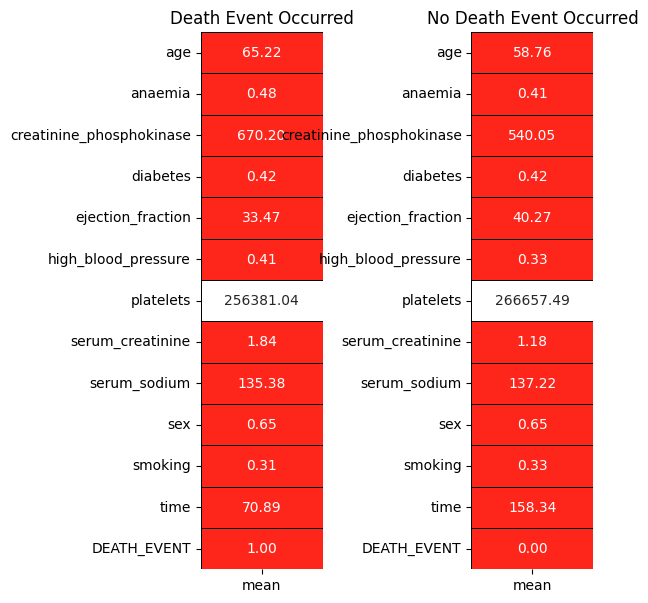

In [77]:
yes = data[data['DEATH_EVENT'] == 1].describe().T
no = data[data['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

**Mean** values of all the features for cases of **DEATH_EVENT** and **No DEATH_EVENT**.

### Dividing features into Numerical and Categorical :

In [78]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 5:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Here, numerical features are defined if the the attribute has more than 5 unique elements else it is a categorical feature.<br>
All categorical features here are boolean features.

In [79]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df1 = data.copy(deep = True)

- Converting the datatypes of **age** and **platelets** features from float to integer.
- Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- Modifications in the original dataset will not be highlighted in this deep copy.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

Below are some EDA WITHOUT the formulation of analytical questions. This section is just to explore and learn more info about the dataset. The analytical questions will be discussed later. Some overlapping can occur between the analytical questions and this section.

### Categorical Features :

#### Distribution of Categorical Features :

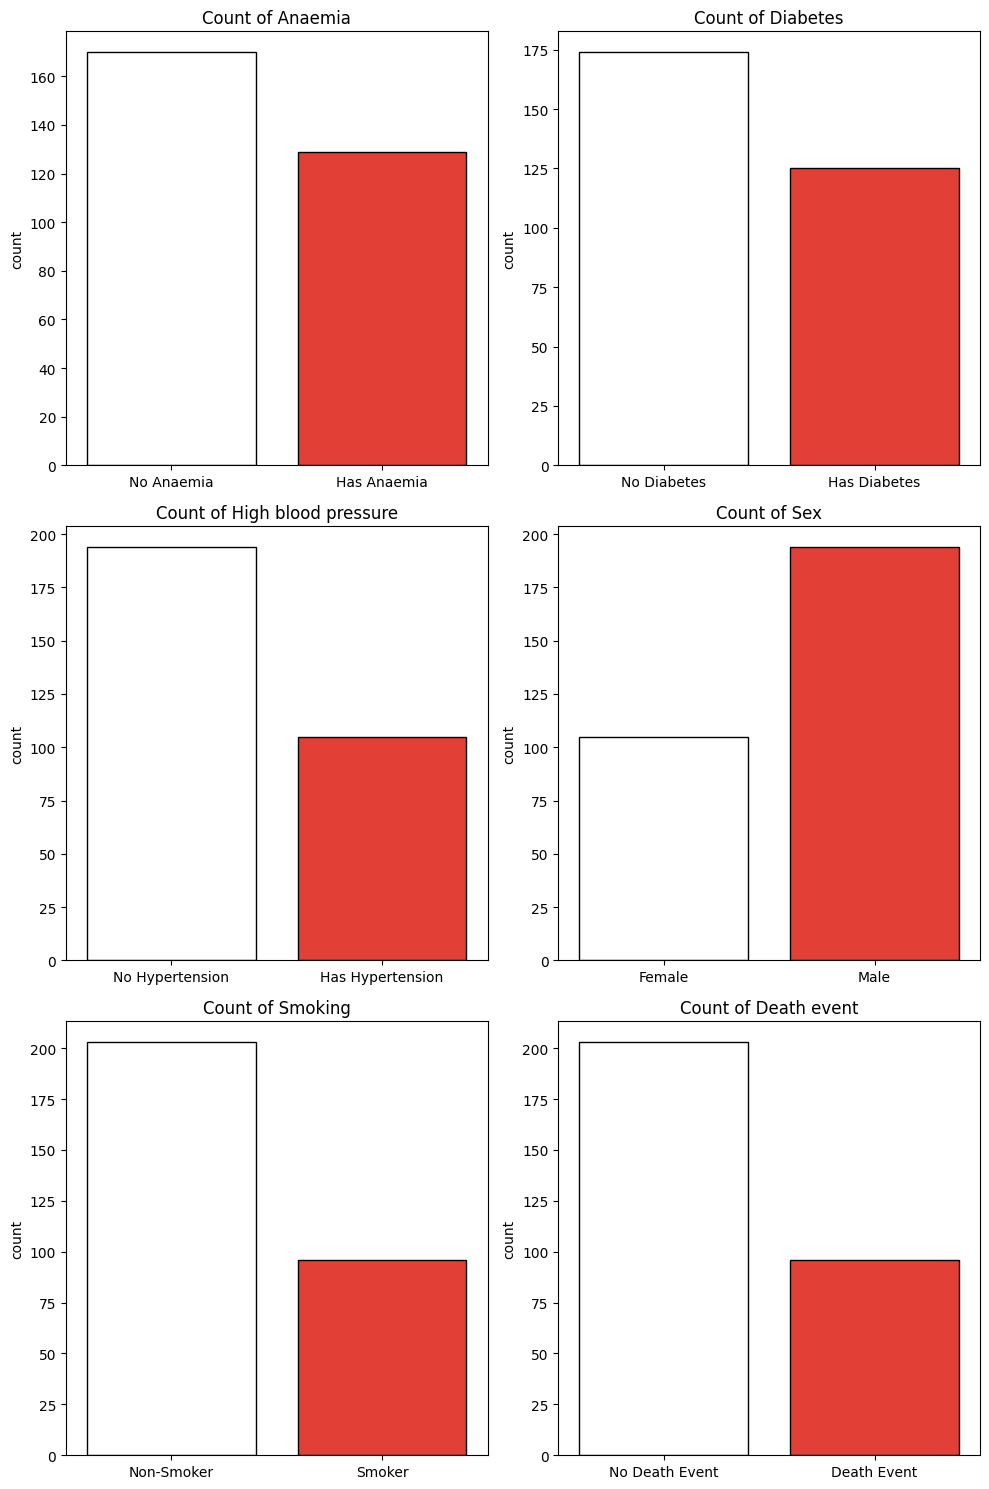

In [80]:
custom_palette = ['#FFFFFF', '#FE251B']

x_tick_titles = {
    'diabetes': ['No Diabetes', 'Has Diabetes'],
    'anaemia': ['No Anaemia', 'Has Anaemia'],
    'high_blood_pressure': ['No Hypertension', 'Has Hypertension'],
    'smoking': ['Non-Smoker', 'Smoker'],
    'sex': ['Female', 'Male'],
    'DEATH_EVENT': ['No Death Event', 'Death Event']
}

# Since they are all boolean features, we use countplot.
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

for i in range(len(categorical_features)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df1[categorical_features[i]], palette=custom_palette, edgecolor='black')
    title = 'Count of ' + categorical_features[i].replace('_', ' ').capitalize()
    plt.title(title)
    plt.xticks([0, 1], x_tick_titles.get(categorical_features[i], ['No', 'Yes']))
    plt.xlabel('')

plt.tight_layout()
plt.show()

The above graphs show distribution of categorical features.

### Numerical Features :

#### Distribution of Numerical Features :

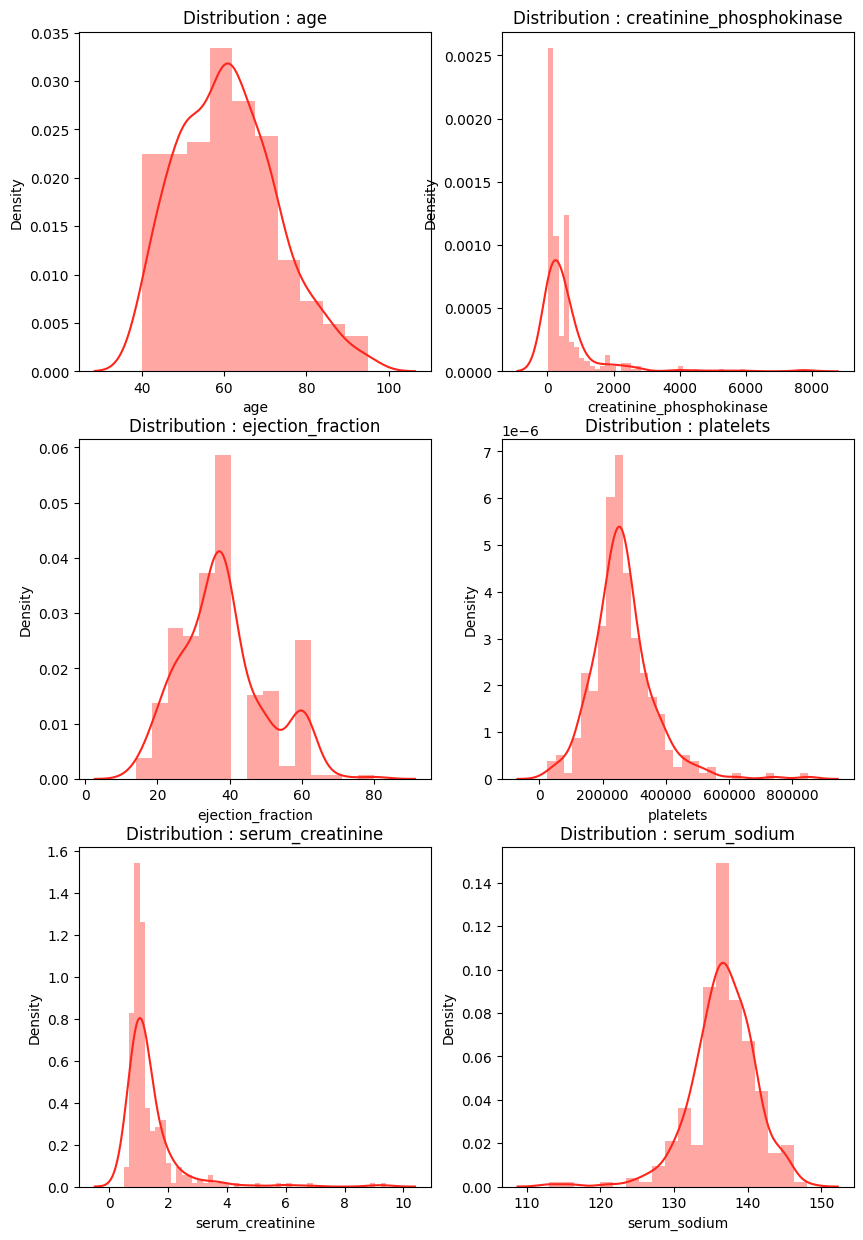

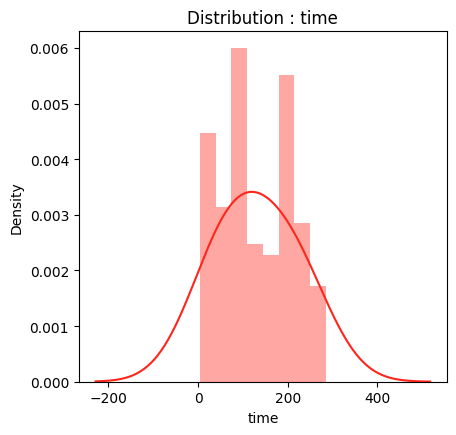

In [81]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Age**,**Creatinine_Phosphokinase**,**Ejaction_Fraction** and **Serum_creatinine** have a **rightly** or **positively skewed** data distribution.
- **Platelets** and **Serum_Sodium** are near about **normally distributed**.
- **Time's** data distribution is similar to a typical **Time Series Analysis** graph with irregularities present in it.

### Target Variable Visualization (DEATH_EVENT) :

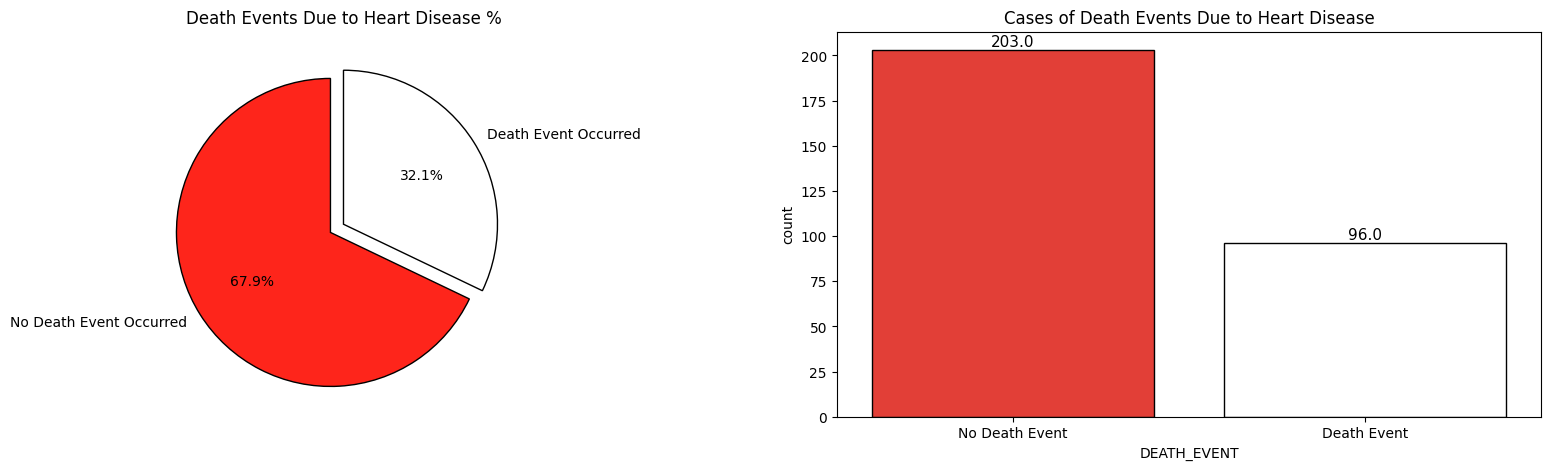

In [82]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
# ax = sns.countplot('DEATH_EVENT', data=data , palette = colors,edgecolor = 'black')
ax = sns.countplot(x='DEATH_EVENT', palette=colors, edgecolor='black', data=data)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

- The dataset is **unbalanced** with very low data points (299)!
- Around **2 : 1** ratio for **No Death Event cases : Death Event cases!**
- Due to this, predictions will be biased towards **No Death Event** cases.
- Visualizations will also display this bias, thus making it difficult to gain insight.

**Conclusion:** This needs to be accounted for when training the prediction model!

### Categorical Features vs Target Variable (DEATH_EVENT) :

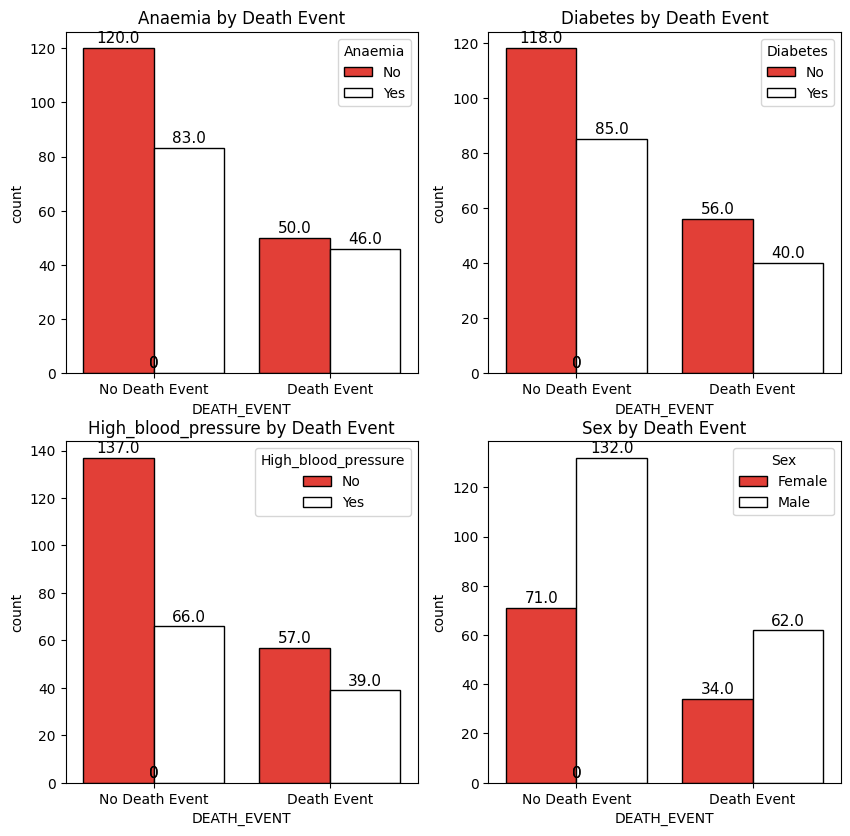

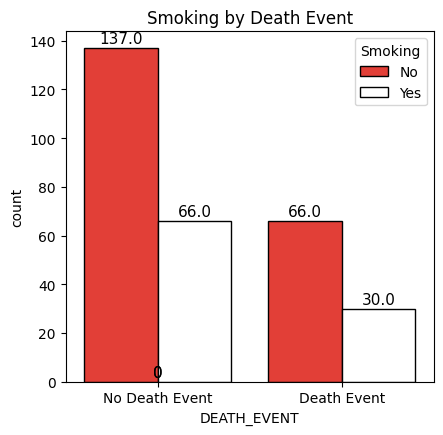

In [83]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 9.75))

for i in range(len(categorical_features) - 2):
    ax = axs[i // 2, i % 2]
    sns.countplot(x="DEATH_EVENT", data=data, hue=categorical_features[i], palette=colors, edgecolor='black', ax=ax)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    ax.set_xticklabels(['No Death Event', 'Death Event'])
    title = categorical_features[i].capitalize() + ' by Death Event'
    ax.set_title(title)
    if categorical_features[i] == 'sex':
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['Female', 'Male'], title='Sex')
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['No', 'Yes'], title=categorical_features[i].capitalize())

plt.figure(figsize=(4.75, 4.55))
ax = sns.countplot(x="DEATH_EVENT", data=data, hue=categorical_features[-2], palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Death Event', 'Death Event'])
title = categorical_features[-2].capitalize() + ' by Death Event'
ax.set_title(title)
if categorical_features[-2] == 'sex':
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['Female', 'Male'], title='Sex')
else:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No', 'Yes'], title=categorical_features[-2].capitalize())

plt.show()

**Discussion**

Anaemia vs Death Event:
Anaemia doesn't seem to drastically change the outcome in terms of death, as the numbers are relatively balanced between anaemic and non-anaemic.

Diabetes vs Death Event:
Diabetes seems to have a minor influence on death outcomes, but the overall effect appears not very significant.

High Blood Pressure vs Death Event:
High blood pressure appears to moderately affect the likelihood of death, but as with diabetes, it is not very significant.

Sex vs Death Event:
Males are represented more in both death events and survival.

Smoking vs Death Event:
Not smoking appears beneficial for survival, as seen by the higher number of survivors among non-smokers. 

For this dataset, each barplot indicates that none of the factors alone (anaemia, diabetes, high blood pressure, smoking) is a definitive predictor of death. The variations are moderate, with overlapping outcomes between patients with and without these health factors. This implies that death events are likely influenced by multiple combined factors rather than any single one. The only significant influence was gender. However, conclusions cannot be drawn at this stage without further analysis.

### Categorical Features vs Cases of DEATH_EVENT :

In [84]:
anaemia = data[data['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = data[data['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = data[data['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = data[data['DEATH_EVENT'] == 1]['sex'].value_counts() # for male examples
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = data[data['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

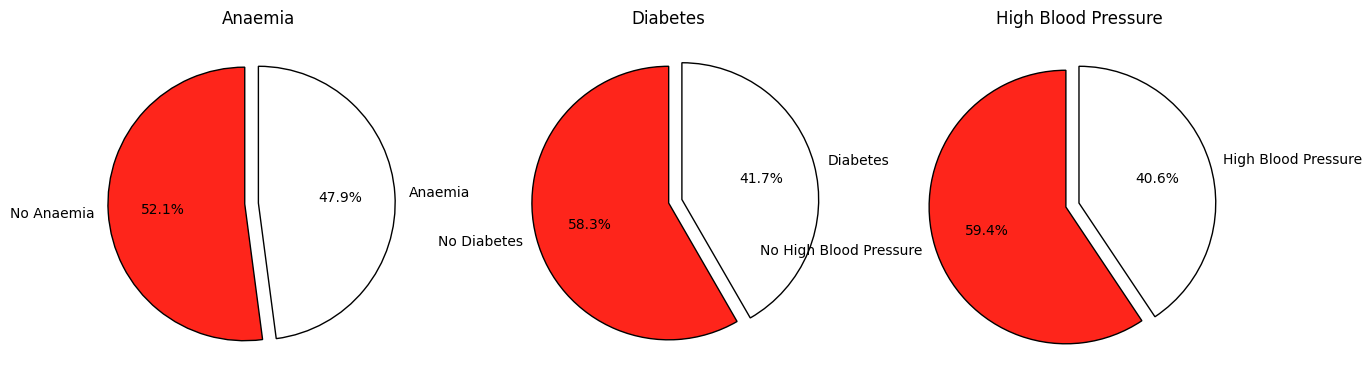

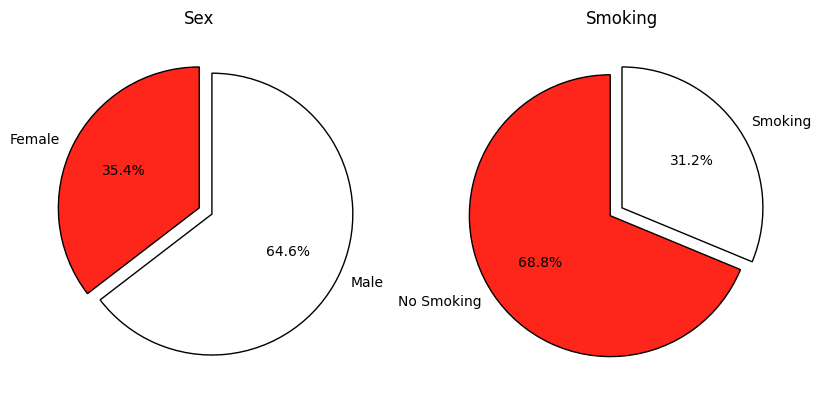

In [85]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

Anaemia, diabetes, and high blood pressure are prevalent in the dataset. However, there is still a larger percentage of patients without these conditions.
Male patients make up a larger part of the dataset compared to female patients.
Smoking is less prevalent, with a majority of patients being non-smokers.
No conclusion can be made thus far without diagnostic analysis.

### Numerical Features vs Target Variable (DEATH_EVENT) :

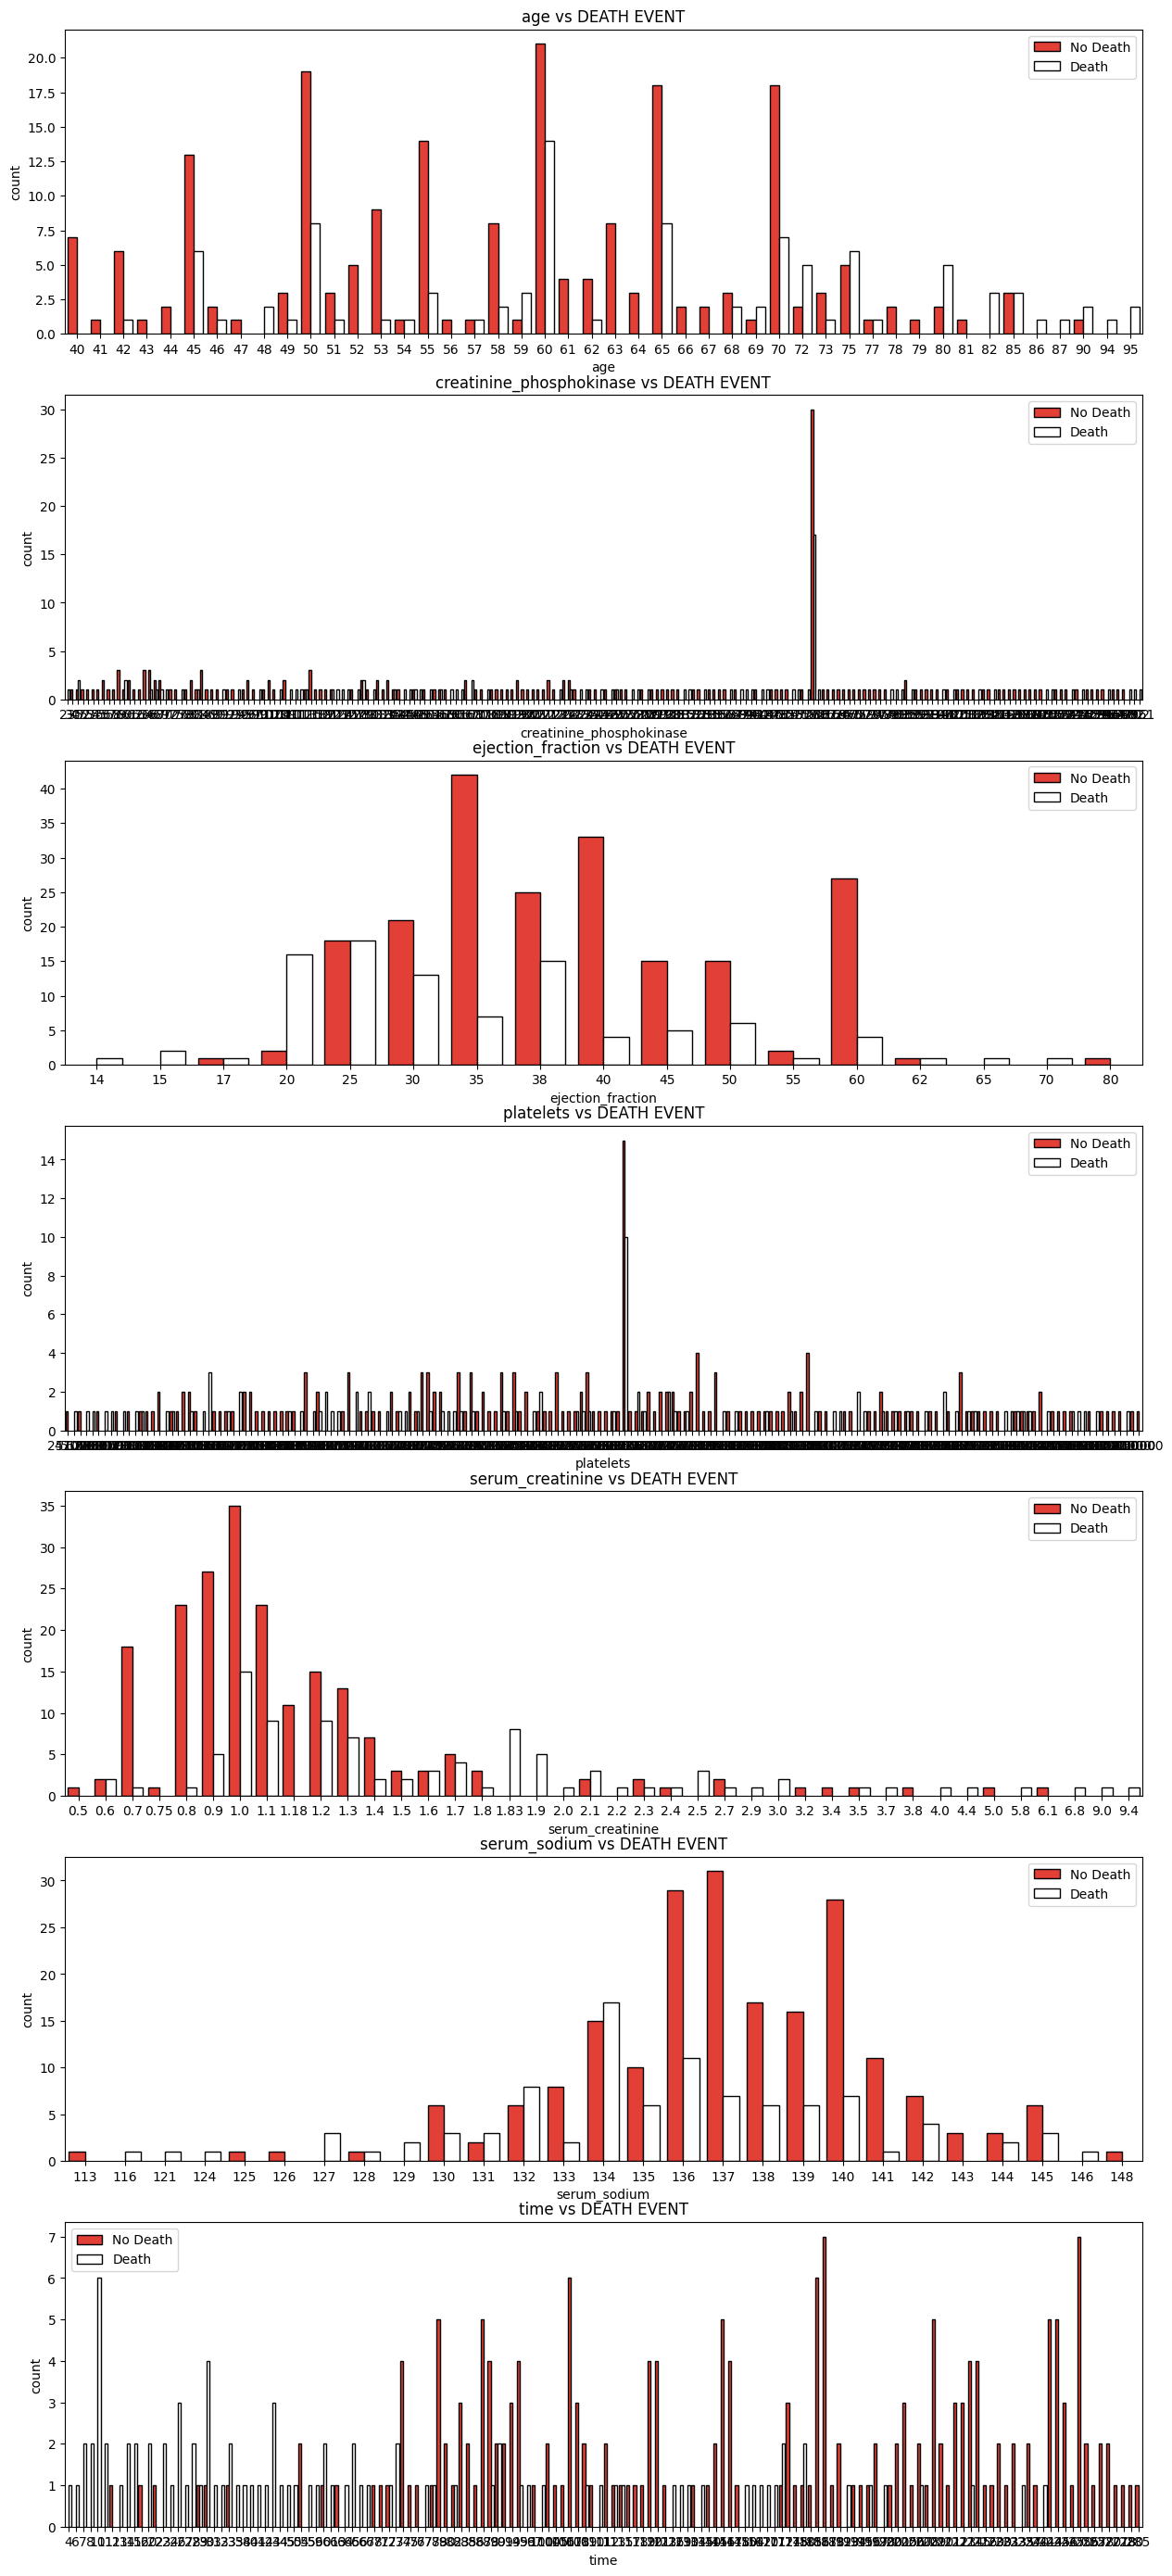

In [86]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,35),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x=numerical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title)

- Cases of **DEATH_EVENT** initiate from the age of **42**. Some specific peaks of high cases of **DEATH_EVENT** can be observed at **45**, **50**, **60**, **65**, **70**, **75** and **80**.
- High cases of **DEATH_EVENT** can be observed for **ejaction_fraction** values from **20 - 60**%.
- **serum_creatinine** values from **0.6 - 3.0** mg/dL have higher probability to lead to **DEATH_EVENT**.
- **serum_sodium** values **127 - 145** mEq/L indicate towards a **DEATH_EVENT** due to heart failure.

- Because of too many unique data points in the **creatinine_phosphokinase**, **platelets** and **time** features, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
- We scale the data points of these features to a constant value that represents a range of values.(like mean)
- Here, we divide the data points constant value and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.

In [87]:
data['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in data['creatinine_phosphokinase']]
data['platelets_Group'] = [ int(i / 10**5) for i in data['platelets']]
data['time_Group'] = [ int(i / 5) for i in data['time']]

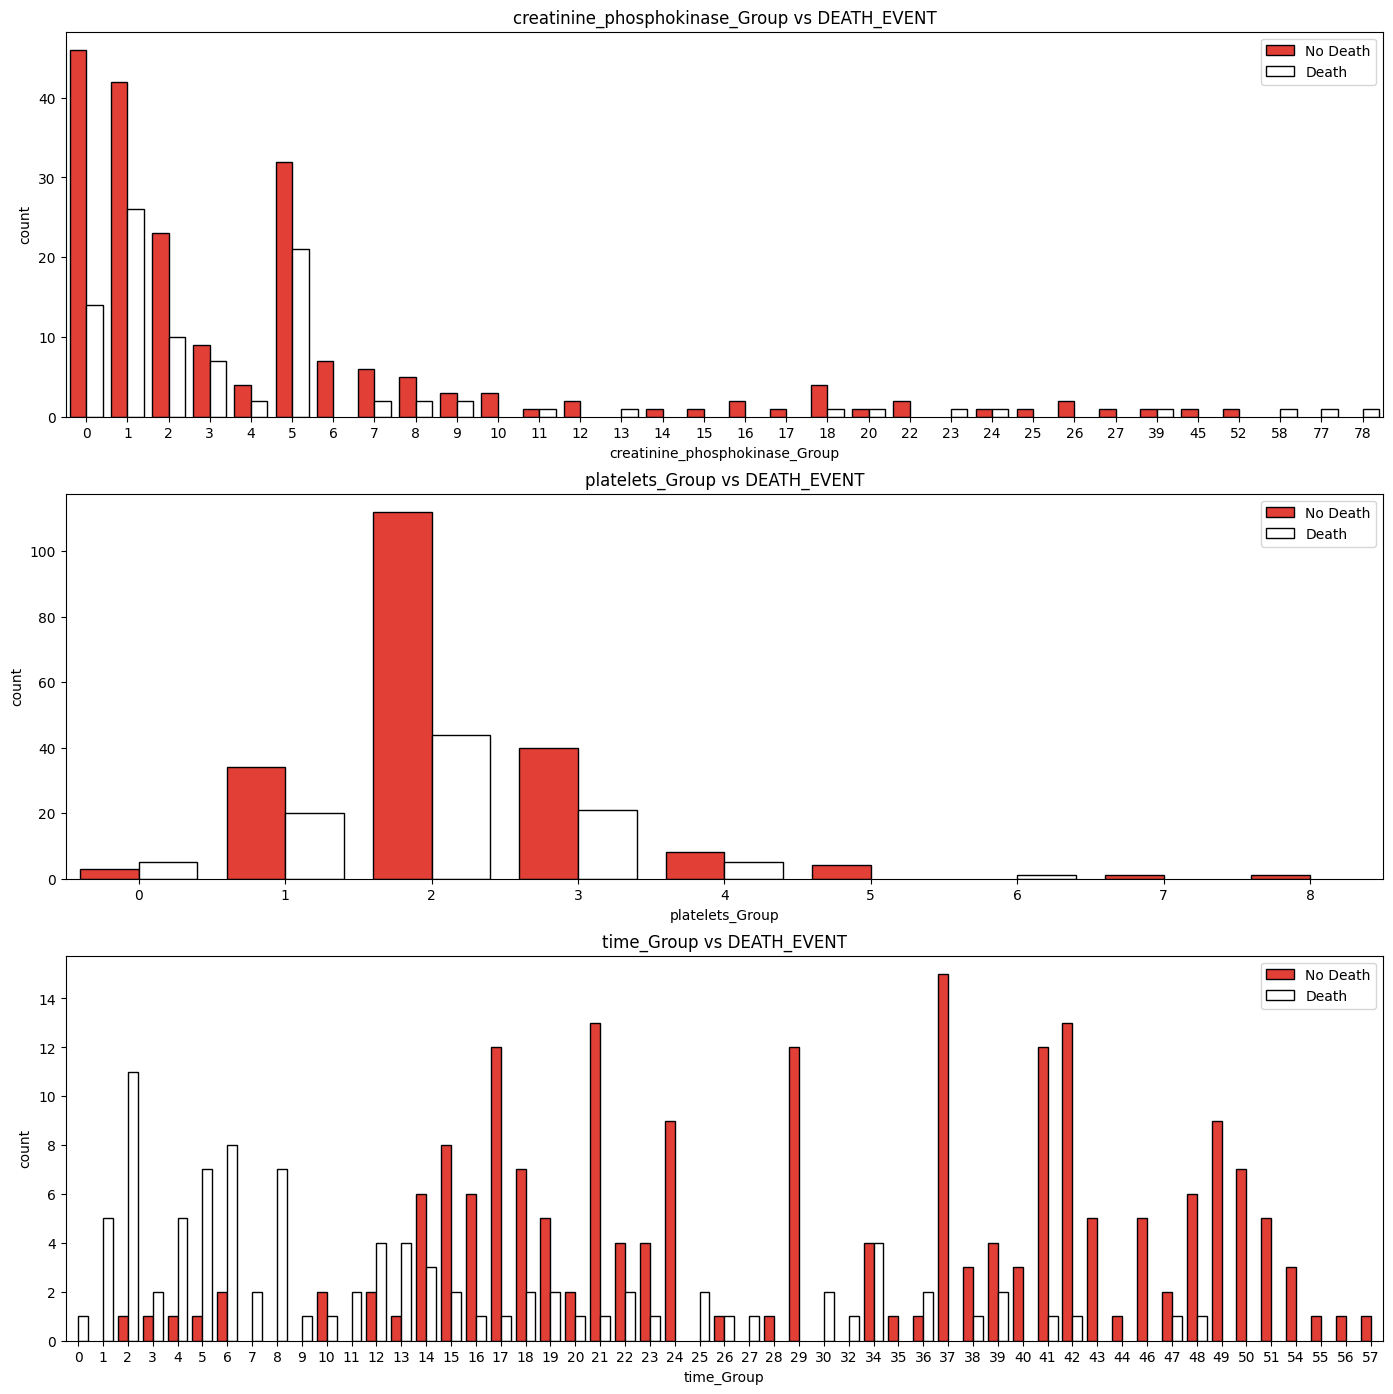

In [88]:
# fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (17,17))
# group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

# for i in range(len(group_numerical_features)):
#     plt.subplot(3,1,i+1)
#     sns.countplot(group_numerical_features[i],data = df1,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
#     title = group_numerical_features[i] + ' vs DEATH_EVENT'
#     plt.title(title)

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 17), squeeze=False)
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

for i in range(len(group_numerical_features)):
    ax = axs[i, 0]
    sns.countplot(x=group_numerical_features[i], data=data, hue="DEATH_EVENT", palette=colors, edgecolor='black', ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    ax.legend(handles, new_labels)
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    ax.set_title(title)

plt.show()

- **DEATH_EVENT** cases are on a high for the values between **0**(0x100) - **500**(5x100) mcg/L for **creatinine_phosphokinase**.   
- **platelets** values between **0**(0x10^5) - **400,000**(4x10^5) kiloplatelets/mL are prone to heart failures leading to **DEATH_EVENT**.
- For the **time** feature, values from **0**(0x5) - **170**(34x5) days (before follow-up) are the days patients are at risk for **DEATH_EVENT**.

### Categorical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

#### anaemia vs Numerical Features :

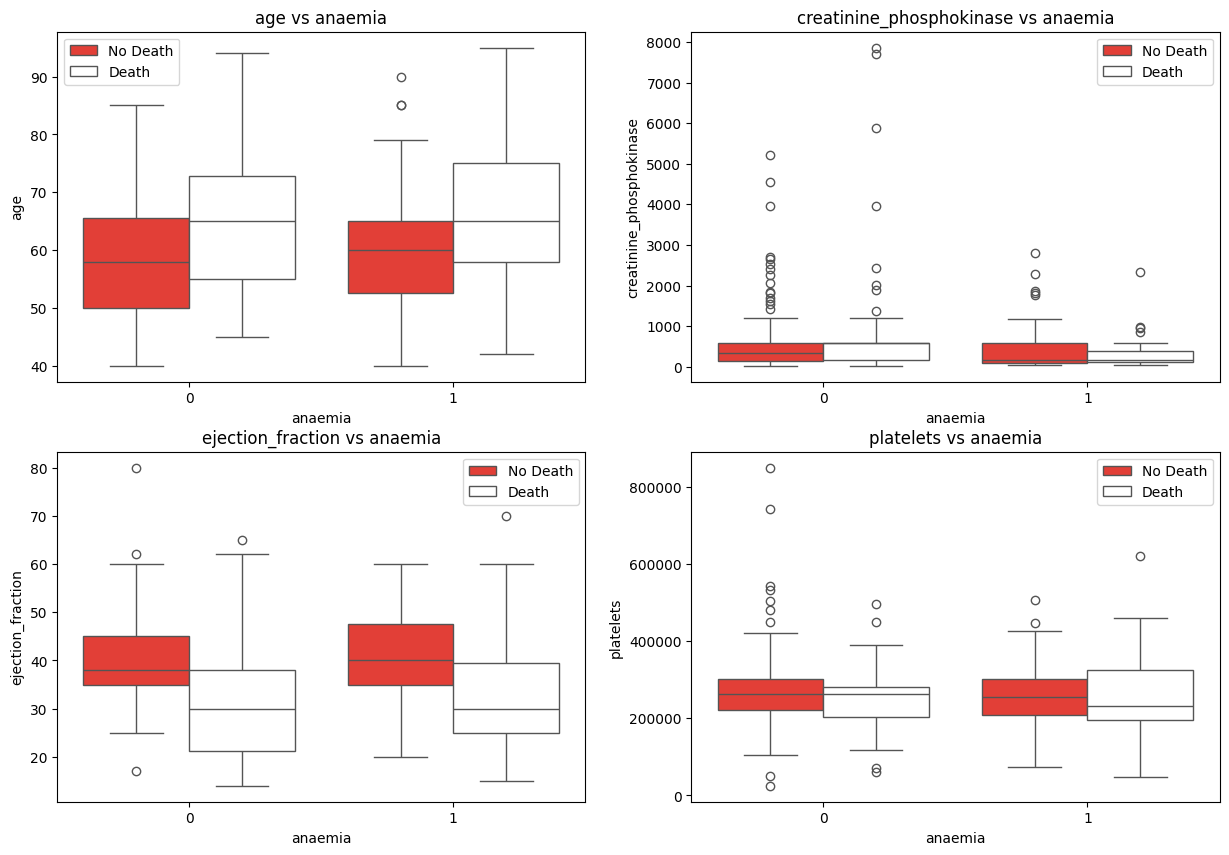

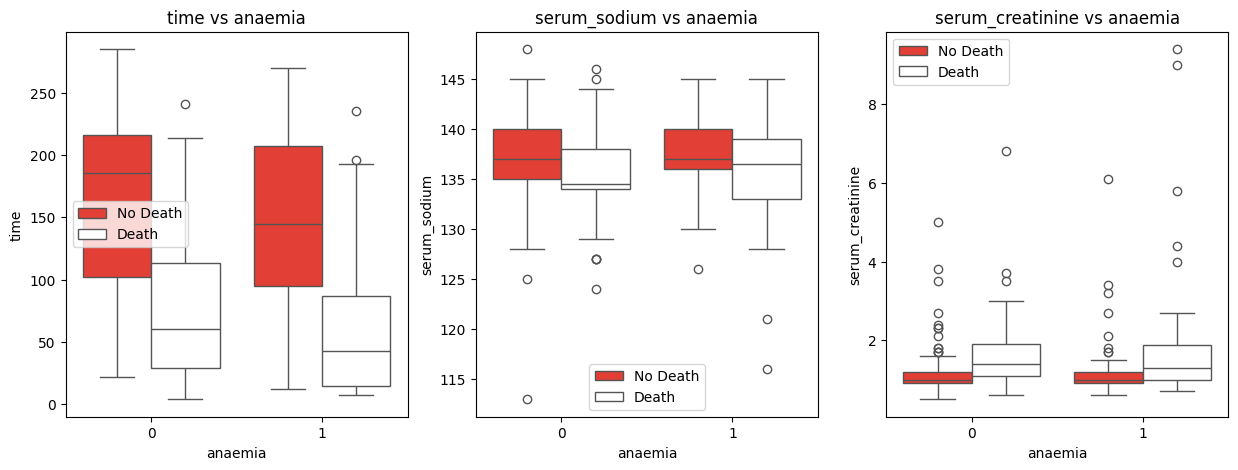

In [89]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

- Irrespective of **anaemia**, **age** group of **55 - 75** and **ejaction_fraction** values of **20 - 40**% are prone to **DEATH_EVENT**.
- Similarly, **serum_creatinine** levels between **1 - 2** mg/dL and **serum_sodium** levels of **130 - 140** mEq/L display a higher chance of leading to a **DEATH_EVENT**.

#### diabetes vs Numerical Features :

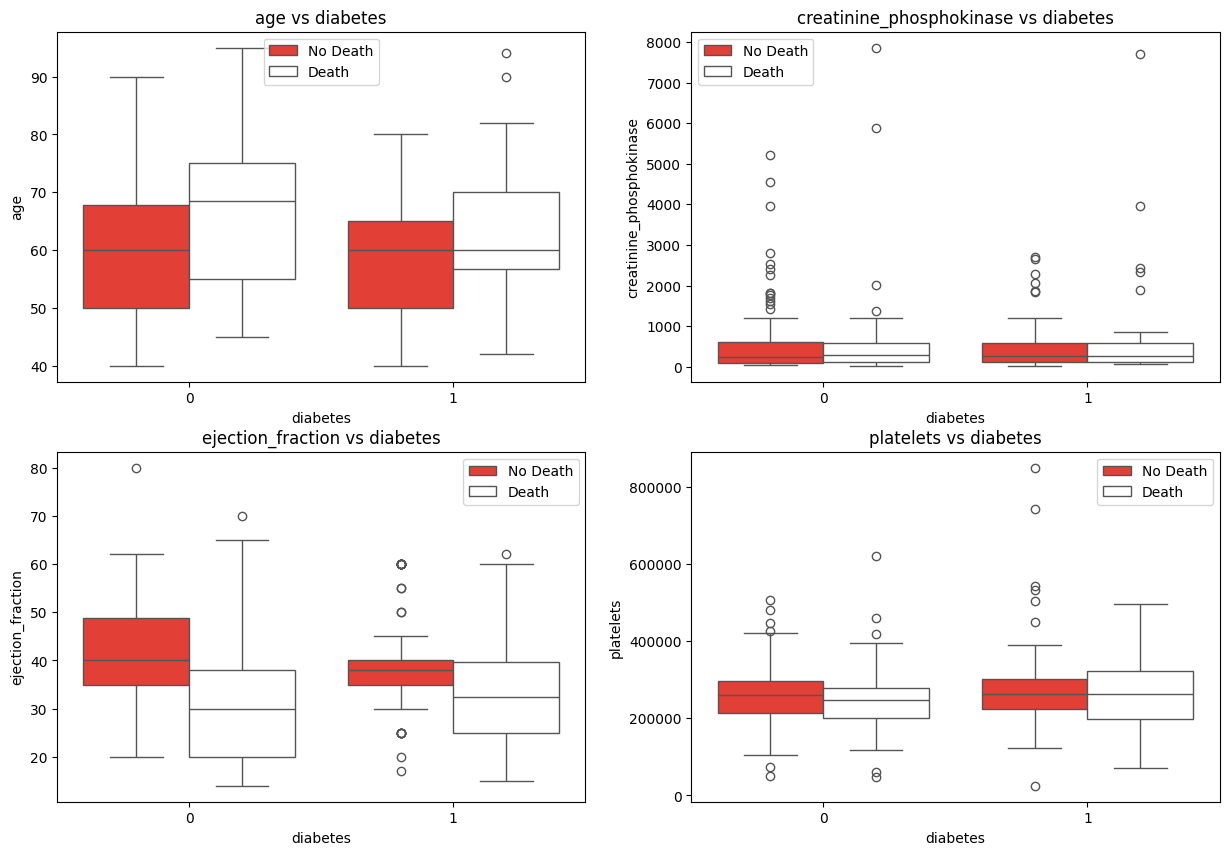

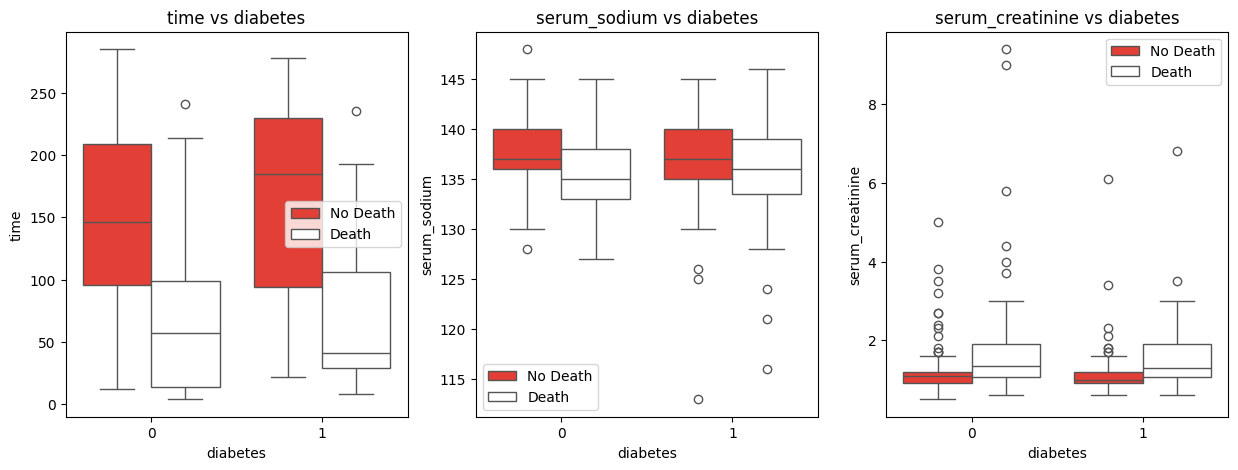

In [90]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

- For **creatinine_phosphokinase**, values from **0 - 500** mcg/L and **platelets** range from **2x10^5 - 3x10^5** kiloplatelets/mL detect more cases of heart failure.
- Similarly, **serum_creatinine** levels between **1 - 2** mg/dL and **time** feature's values from **0 - 100** days highlight more heart failure cases.

#### high_blood_pressure vs Numerical features :

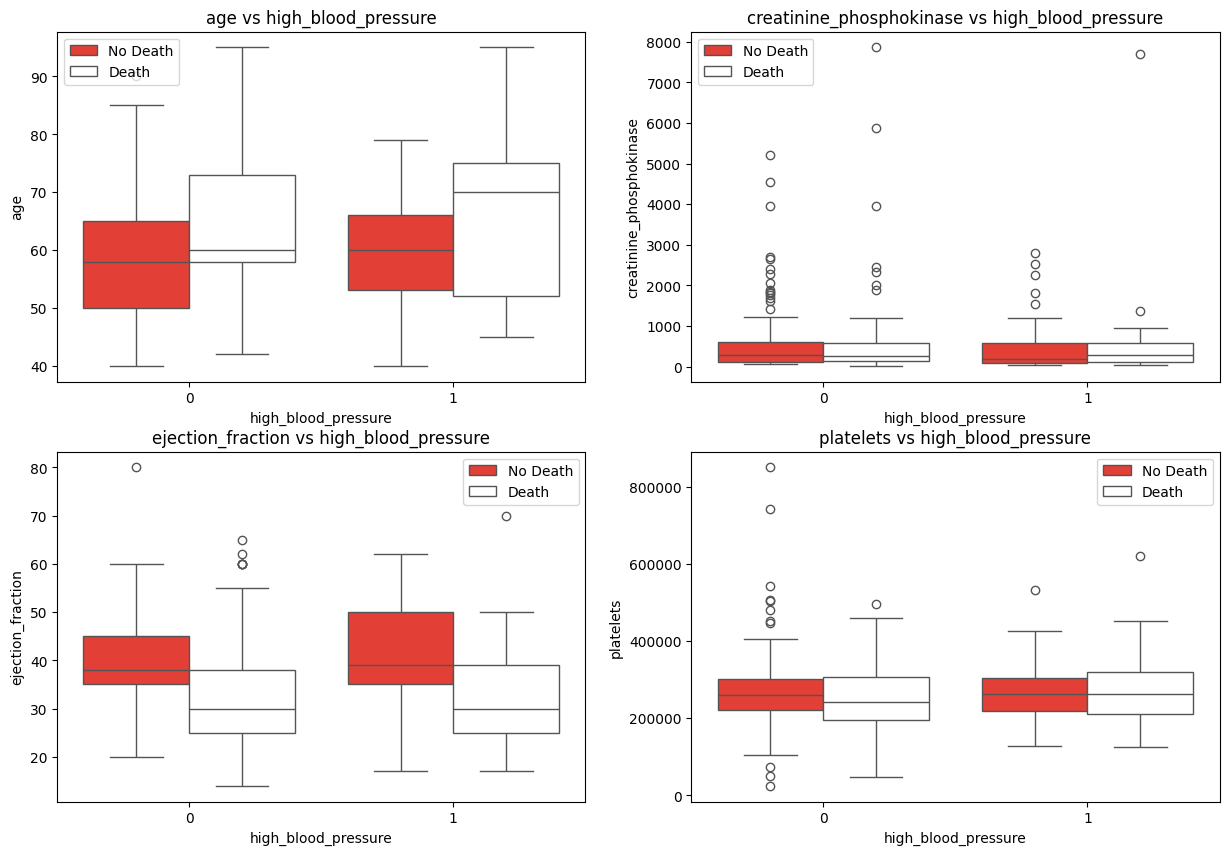

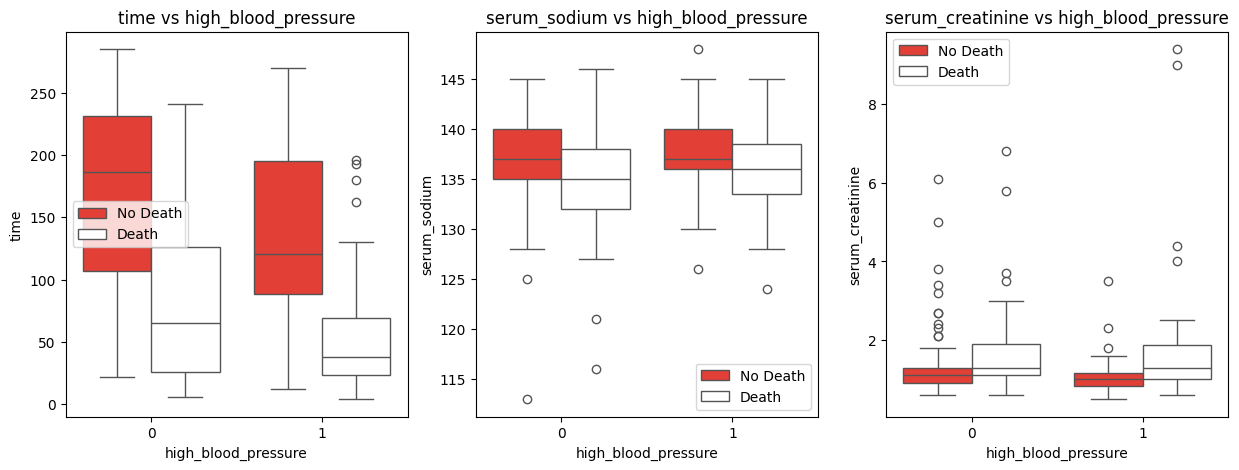

In [91]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

- Due to **high_blood_pressure**, **age** at which the **DEATH_EVENT** occurs for heart failure increases its range of values. The lower threshold of age limit drops just **below 55** and upper limit extends **over 70**.
- Chances of confronting a **DEATH_EVENT** due to **high_blood_pressure** lowers the values of **time** feature's values and increases the chances of heart failure.

#### Sex vs Numerical Features :

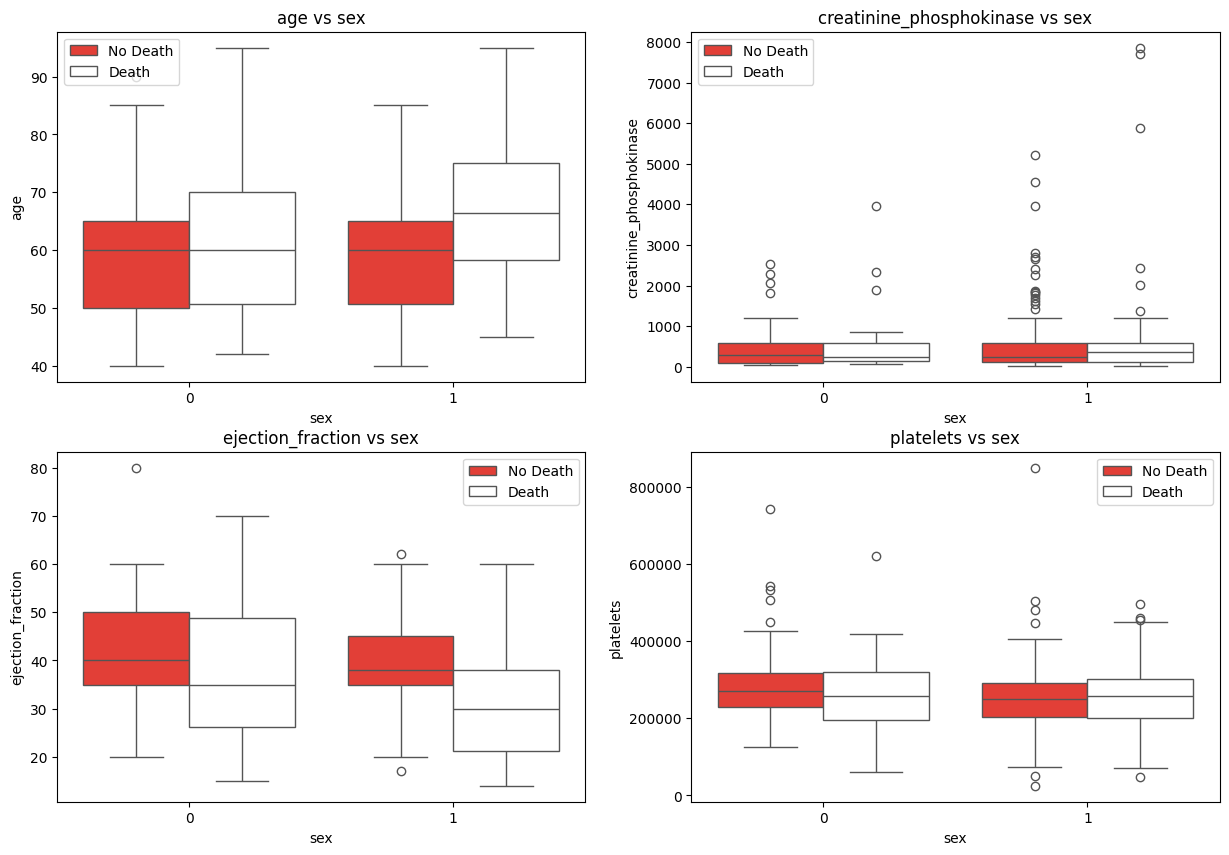

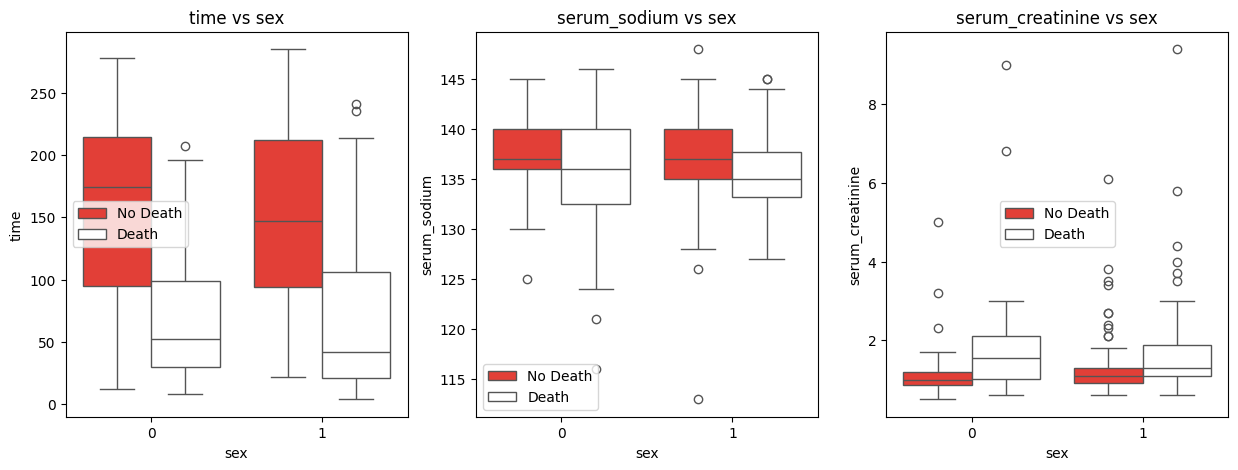

In [92]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

- For female(0) population, **age** group **50 - 70** and male(1) population's **age** group **60 - 75** are more prone to heart failure leading to **DEATH_EVENT**.
- **ejaction_fraction** values for female(0) population of age **25 - 50** and age **20 - 40** for male(1) population leads to cases of **DEATH_EVENT**.
- **serum_sodium** values indicating **DEATH_EVENT** due to heart failure is different for male and female.

#### Smoking vs Numerical Features :

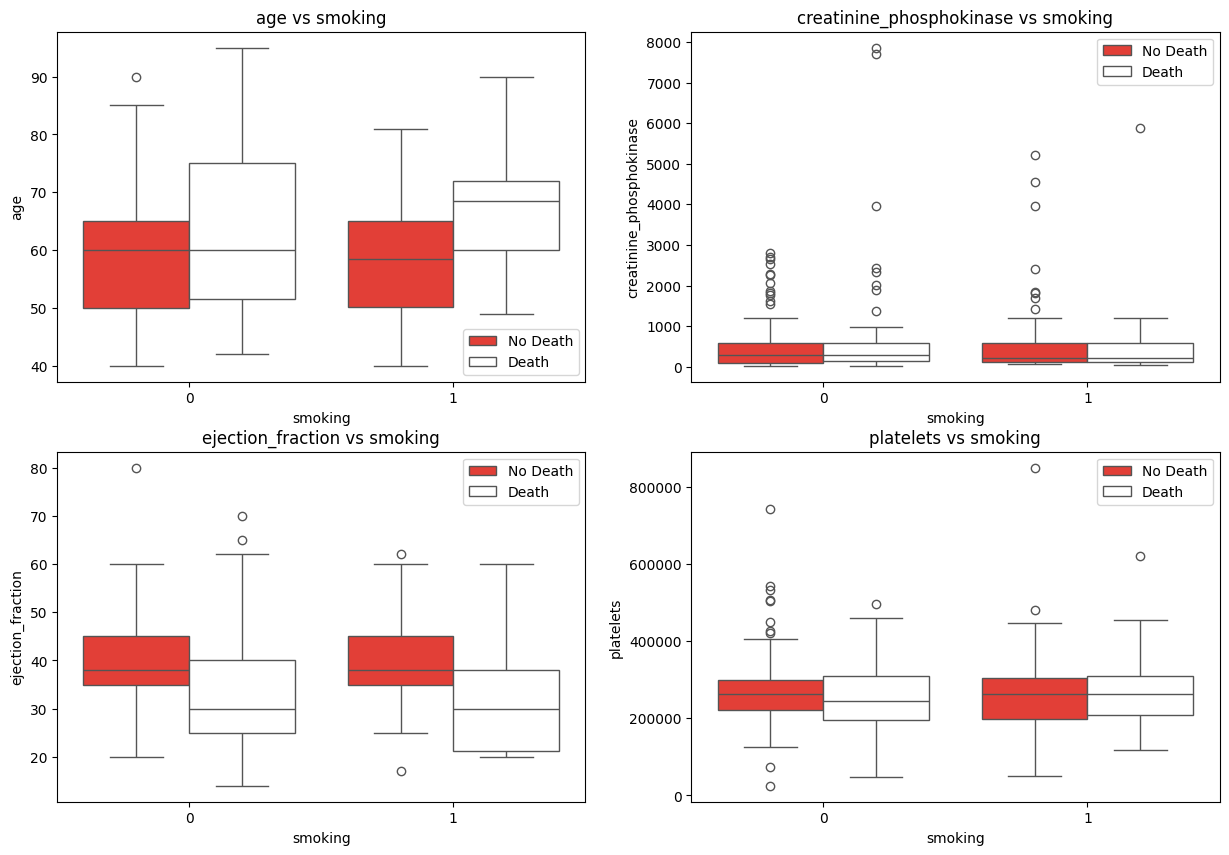

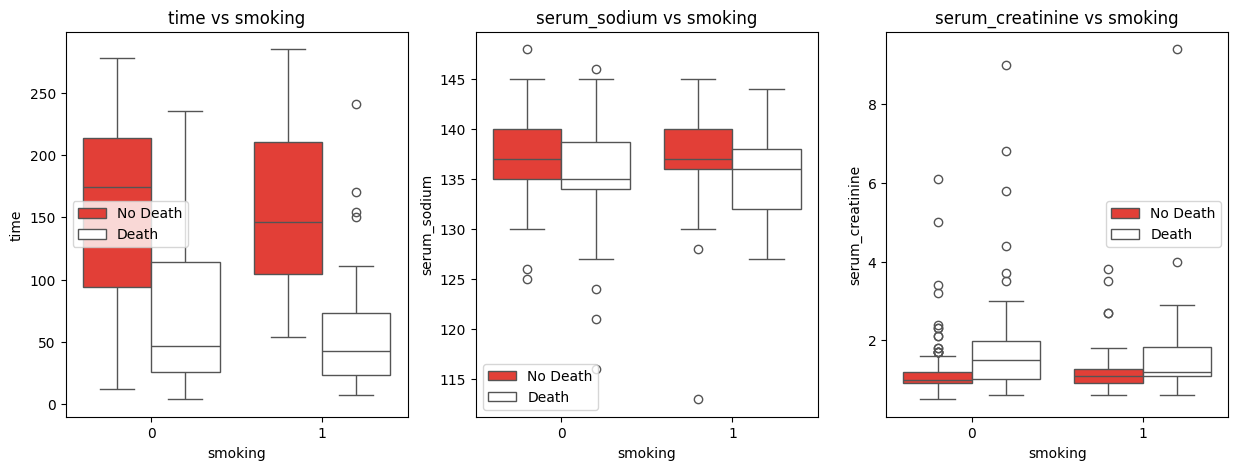

In [93]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)
    
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking'
    plt.title(title);
    handles, labels = plt.gca().get_legend_handles_labels()
    new_labels = ['No Death', 'Death']
    plt.legend(handles, new_labels)

- **age** group of **60 - 70** dominates the cases for **DEATH_EVENT** due to **smoking**.
- **Smoking** reduces the range for the **time** feature to **0 - 75** days that someone might face a **DEATH_EVENT**.

### Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

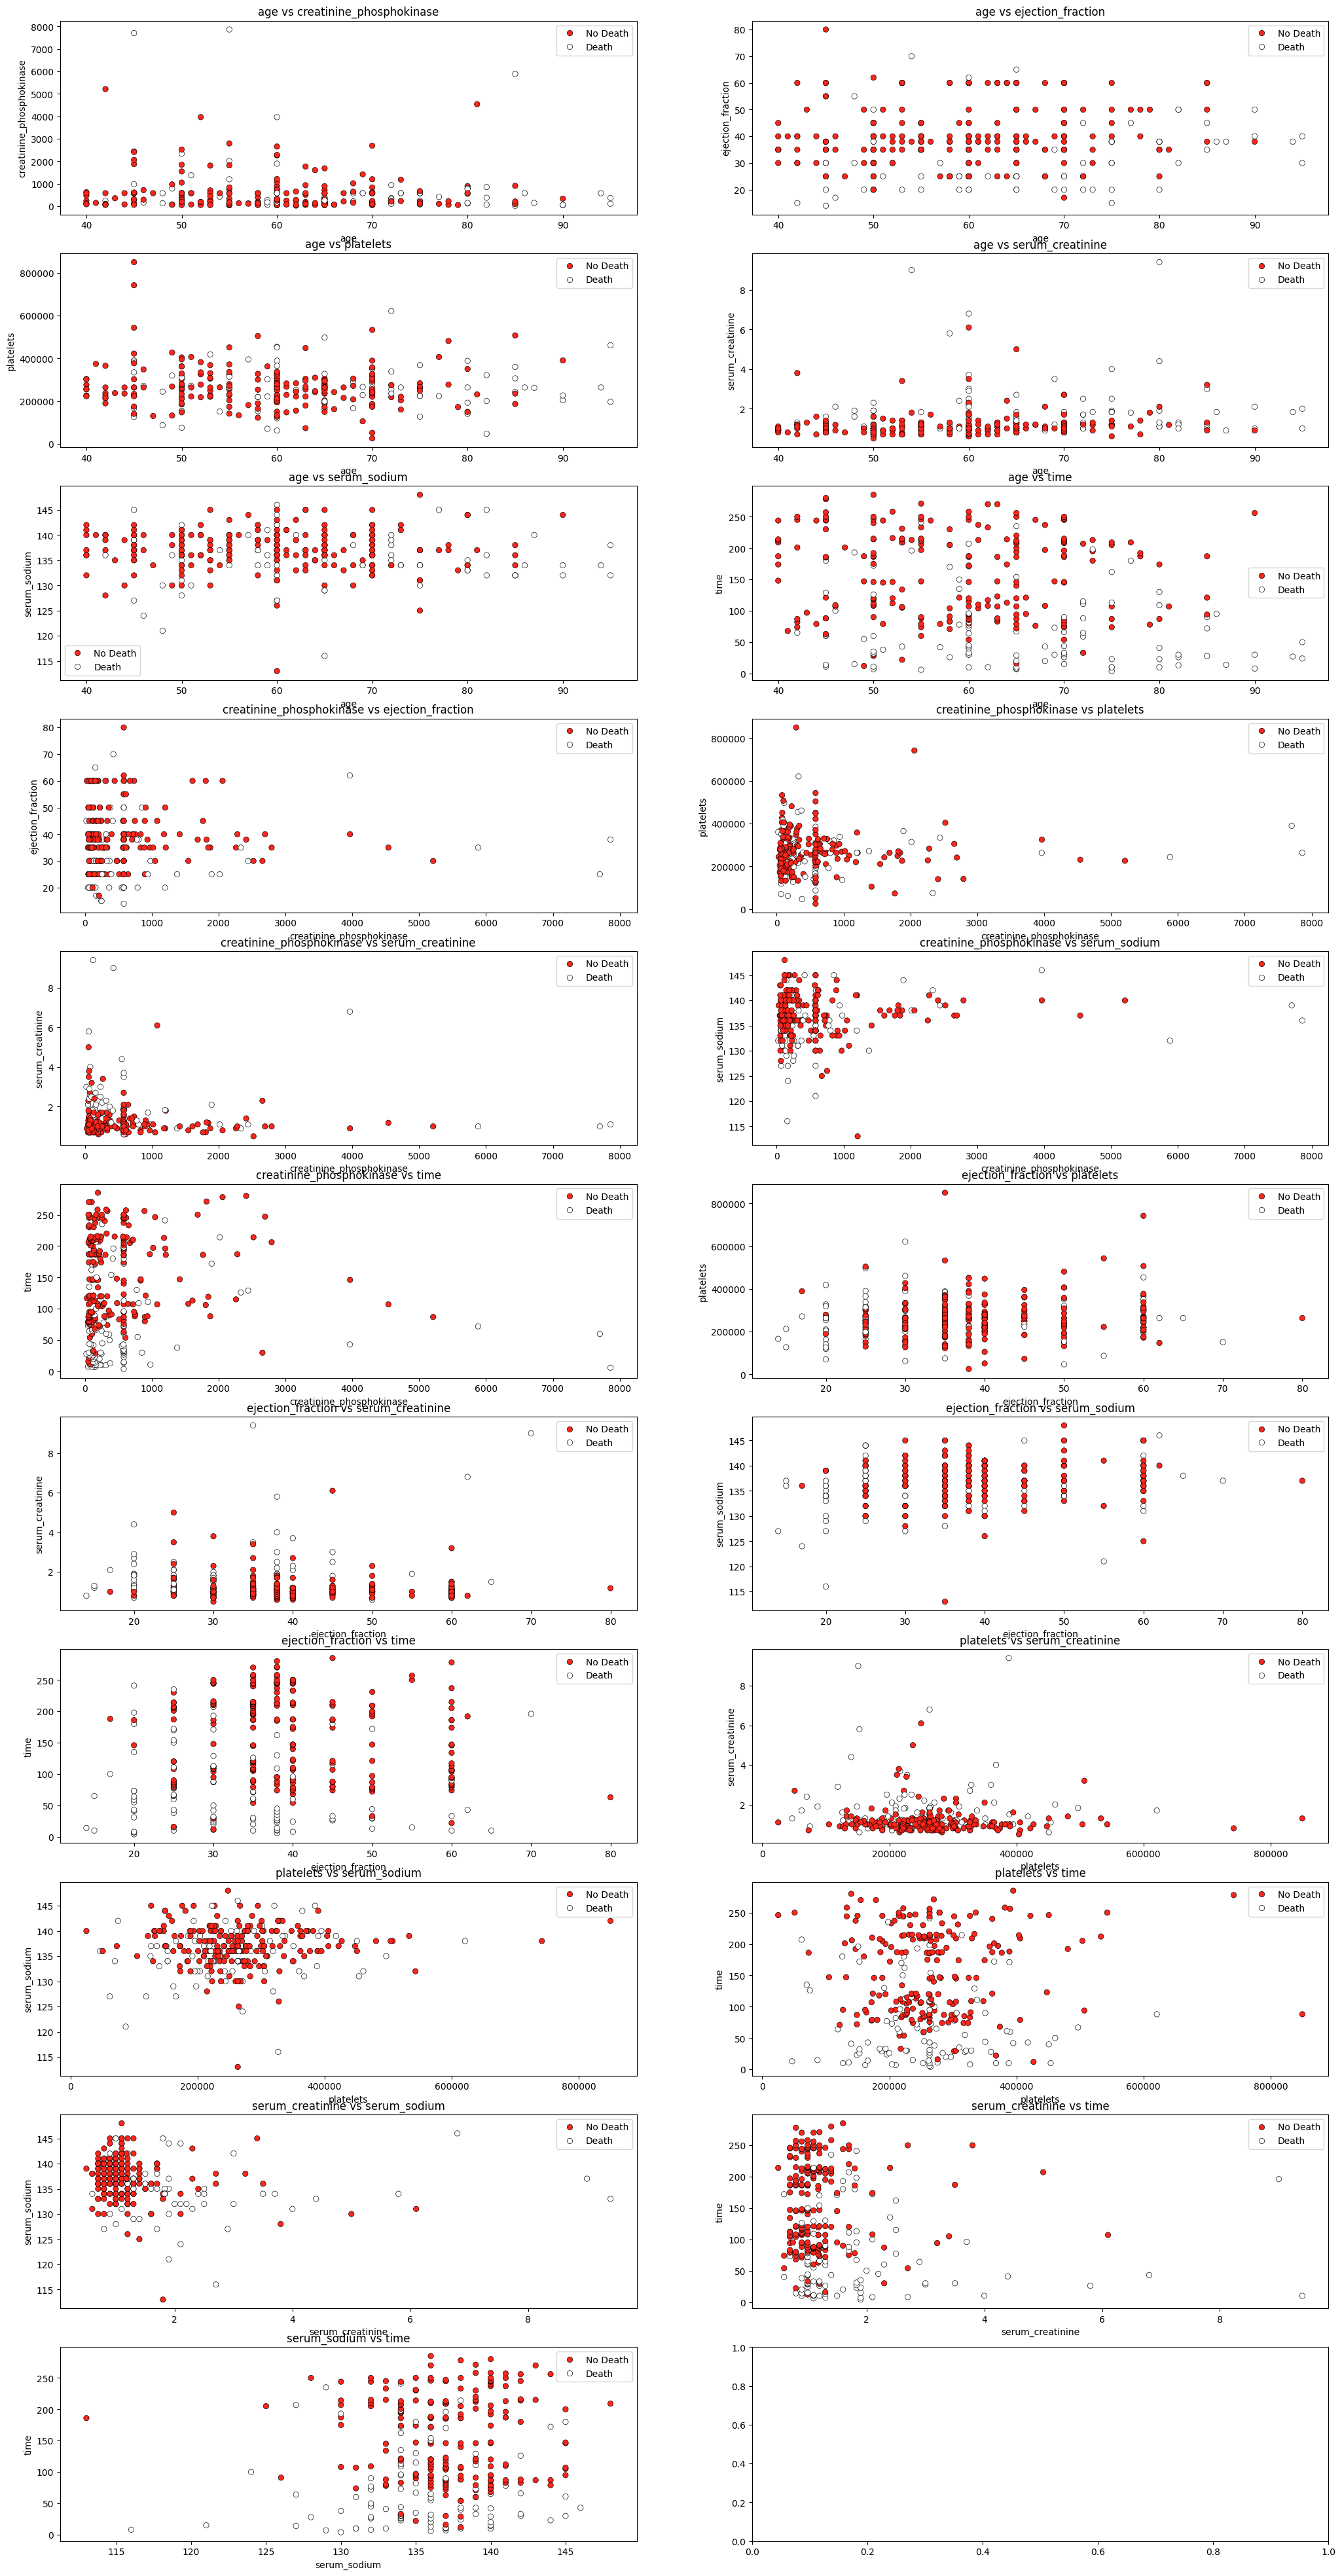

In [94]:
a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)
            handles, labels = plt.gca().get_legend_handles_labels()
            new_labels = ['No Death', 'Death']
            plt.legend(handles, new_labels)

- For **time vs age** plot, **DEATH_EVENT** peaks can be found at **age** values of 50, 60, 70 and 80 for **time** (days)) range between **50 - 100**.
- **creatinine_phosphokinase** values between 0 - 500 mcg/L are dominant in recording **DEATH_EVENT** irrespective of other features.
- Similarly, **ejaction_fraction** values between **20 - 40**% record high number of cases of **DEATH_EVENT**.
- **platelets** range of values between **2x10^5 - 4x10^5** kiloplatelets/mL and **time** between **0 - 50** days is a strong indicator for **DEATH_EVENT**.
- Another indicator for **DEATH_EVENT** is **serum_creatinine** values from **1 - 2** mg/dL.
- **serum_sodium** range of values from **130 - 140** mEq/L record high number of cases for **DEATH_EVENT**.

- Most of these findings are in line with the scientific article the dataset was adopted from [1].

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Summary EDA</div></center>

### Order / Values of features for positive cases of heart failure (DEATH_EVENT) :

- **Categorical Features (Order) :**
    
    - **anaemia** : Anaemia = No Anaemia
    - **diabetes** : Diabetes = No Diabetes
    - **high_blood_pressure** : High Blood Pressure > No High Blood Pressure (Insufficient data)
    - **sex** : Male > Female
    - **smoking** : Smoking > No Smoking


- **Numerical Features (Range) :**
    
    - **age** : 50 - 70
    - **creatinine_phosphokinase** : 0 - 500 mcg/L
    - **ejaction_fraction** : 20 - 40%
    - **platelets** : 200,000 - 300,000 kiloplatelets/mL
    - **serum_creatinine** : 1 - 2 mg/dL
    - **serum_sodium** : 130 - 140 mEq/L
    - **time** : 0 - 50 days


- **According to the dataset, these order / range of values possibly leads to heart failures.**

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Descriptive Analytics</div></center>

It is important to note that the **Descriptive Analytics** by the formulation of descriptive questions of the dataset, can overlap with the findings from the EDA. The distinction is that EDA was conducted to explore all the available features of the dataset to understand it better. The following Descriptive Analytical questions are examples of what the **target** user may consider while using the prospective **web dashboard** the team is developing."

### Convert Boolean Data

In [95]:
data["anaemia"] = data["anaemia"].map({0: "No", 1: "Yes"})
data["diabetes"] = data["diabetes"].map({0: "No", 1: "Yes"})
data["high_blood_pressure"] = data["high_blood_pressure"].map({0: "No", 1: "Yes"})
data["smoking"] = data["smoking"].map({0: "No", 1: "Yes"})
data["DEATH_EVENT"] = data["DEATH_EVENT"].map({0: "No", 1: "Yes"})
data["sex"] = data["sex"].map({0: "Female", 1: "Male"})

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_Group,platelets_Group,time_Group
0,75,No,582,No,20,Yes,265000,1.90,130,Male,No,4,Yes,5,2,0
1,55,No,7861,No,38,No,263358,1.10,136,Male,No,6,Yes,78,2,1
2,65,No,146,No,20,No,162000,1.30,129,Male,Yes,7,Yes,1,1,1
3,50,Yes,111,No,20,No,210000,1.90,137,Male,No,7,Yes,1,2,1
4,65,Yes,160,Yes,20,No,327000,2.70,116,Female,No,8,Yes,1,3,1


### Q1: What proportion of heart failure patients died compared to those who survived in the dataset?

First, we get the numerical figures of patients who died respectively still surviving.

In [96]:
data.groupby(by="DEATH_EVENT").size()

DEATH_EVENT
No     203
Yes     96
dtype: int64

We then convert it to a pie chart for visualisation.

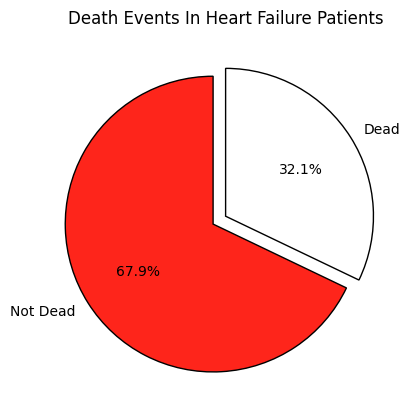

In [97]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

plt.pie(circle,labels = ['Not Dead','Dead'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events In Heart Failure Patients');

Based on the pie chart, the dataset has almost 68% of heart failure patients still alive, while 32% are dead before the follow-up period. Good news for the target users, however it may lead to difficulty in the prediction modeling. 

### Q2: How does the age distribution vary, and which age group has the highest number of heart failure patients in the dataset?

In [98]:
data["age"].describe()

count   299.00
mean     60.83
std      11.89
min      40.00
25%      51.00
50%      60.00
75%      70.00
max      95.00
Name: age, dtype: float64

Numerical figures showing the mean age is 60-61. Let's plot a histogram to display the distribution.

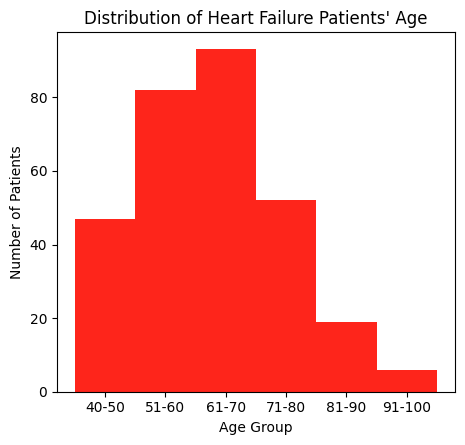

In [99]:
bins = [40, 50, 60, 70, 80, 90, 100]
bin_labels = ['40-50', '51-60', '61-70', '71-80', '81-90', '91-100']

colors = ['#FE251B']
fig, ax = plt.subplots(figsize=(4.75, 4.55))

ax.hist(data['age'], bins=bins, color=colors)

ax.set_xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
ax.set_xticklabels(bin_labels)

ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Patients")
plt.title("Distribution of Heart Failure Patients' Age")

plt.tight_layout()
plt.show()

Based on the results, heart failure patients range from 40 to 95 years old, with an average age of 61 year old. This is close to the global average [19]. What is worrisome is that patients below 60 years of age have heart failure.

### Q3: What is the age distribution among deceased and surviving heart failure patients?

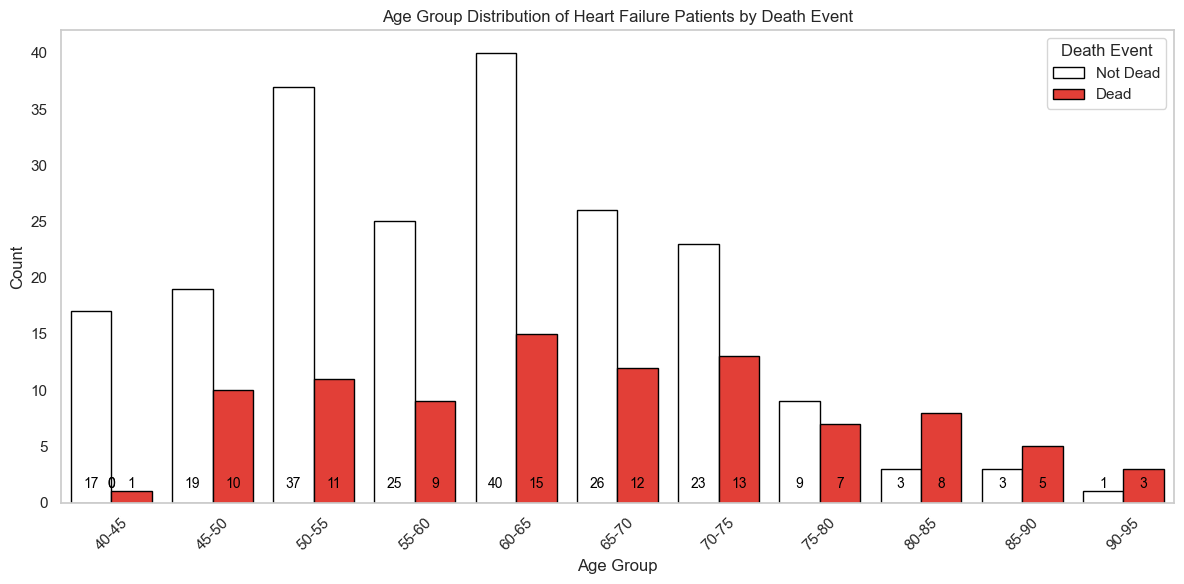

In [113]:
data['age_group'] = pd.cut(data['age'], bins=range(40, 100, 5), right=False)

colors = ['#FFFFFF', '#FE251B']

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='age_group', hue='DEATH_EVENT', palette=colors, edgecolor='black')
ax.set_xticklabels([f"{int(b)}-{int(b+5)}" for b in range(40, 95, 5)], rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., 1),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Age Group Distribution of Heart Failure Patients by Death Event')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Death Event', labels=['Not Dead', 'Dead'])
plt.tight_layout()
plt.show()

The dataset indicates that both death and survival is more prevalent among patients around 60 years of age. The death rate was significantly lower among patients around 40 years old, while it was higher in those aged 80 and above compared to the survival rate. Essentially, death events become more common starting from the age of 60 and onwards, though survival rates still tend to be higher until older age groups like 80-85 and beyond, where death events become more frequent or equal, aligning with evidence [4, 5]. 

### Q4: What is the proportion difference between male and female among  heart failure patients?

In [100]:
data.groupby(by="sex").size()

sex
Female    105
Male      194
dtype: int64

Distribution of patients categorized according to sex in the dataset. Pie chart will show the percentage below.

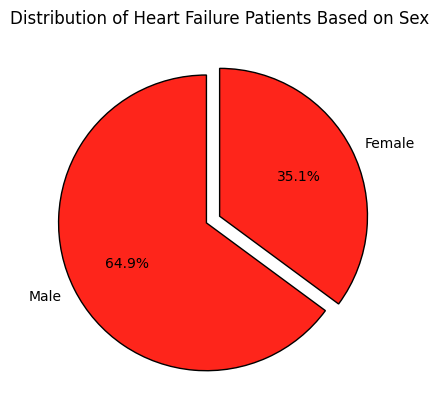

In [101]:
l = list(data['sex'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

plt.pie(circle,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Distribution of Heart Failure Patients Based on Sex');

Based on the results, 65% are male, and 35% female. This shows that heart failure is more common among males. 
In scientific literature, it shows that females with heart failure survive longer than the opposite sex and have a **lower** risk of death [22]. This is an interesting aspect to explore of the dataset

### Q5: What is the distribution of both sexes among deceased and surviving heart failure patients?

This is a follow up question from "What is the proportion difference between male and female among  heart failure patients?". These will be plotted in a stacked bar chart.

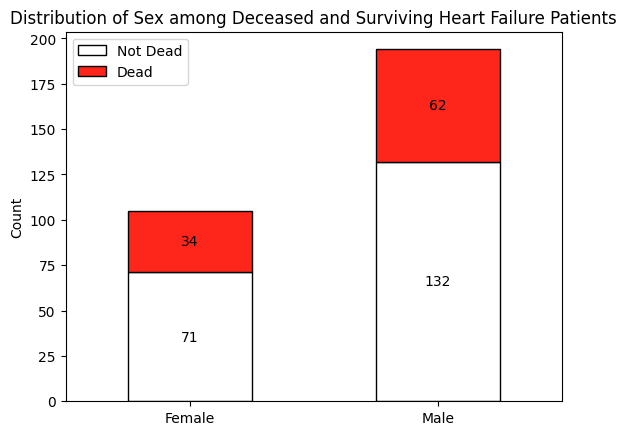

In [102]:
# Cross-tabulation
sex_death_distribution = pd.crosstab(data['sex'], data['DEATH_EVENT'])

# Plotting the stacked bar chart
ax = sex_death_distribution.plot(kind='bar', stacked=True, color=['#FFFFFF', '#FE251B'], edgecolor='black')

# Adding title and labels
plt.title('Distribution of Sex among Deceased and Surviving Heart Failure Patients')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Dead', 'Dead'])
plt.xlabel('')

# Adding values in the middle of each stack
for p in ax.patches:
    width = p.get_width()   # bar width
    height = p.get_height()  # bar height
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

# Show plot
plt.show()

From the results, males have a higher count of death events compared to females. This chart suggests a potential relationship between sex and mortality among heart failure patients. It is also according to evidence that male have higher mortallity risk among heart failure patients [5, 26].

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Diagnostic Analytics</div></center>

Here, some clinical questions target users may ask are discussed.

### Q1: Why Are Certain Heart Failure Patients at Risk of Death? 

To find this, we need to investigate the correlations between **Death** and the various features in the dataset. By finding the correlations, we can identify why certain heart failure patients are at risk of death. So, let's do a heatmap:

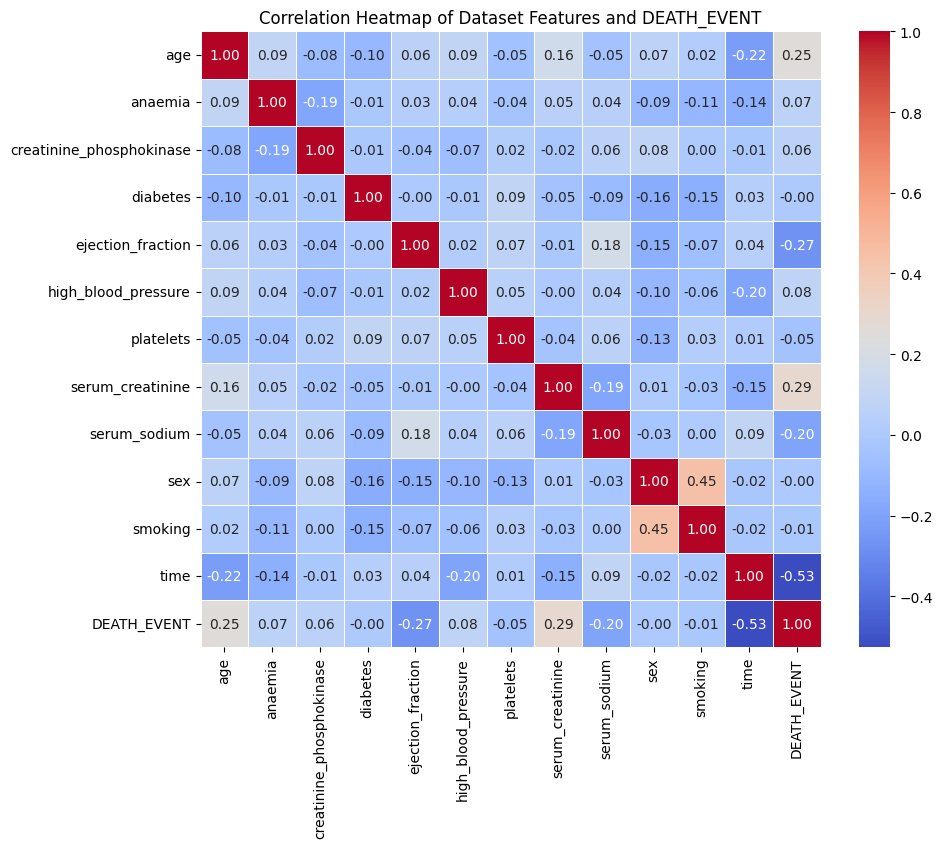

In [104]:
data1 = df1
for column in data1.columns:  
    if data1[column].dtype == object and set(data1[column].dropna().unique()).issubset({'Yes', 'No'}):
        data1[column] = data1[column].map({'Yes': 1, 'No': 0})

if 'sex' in data1.columns and data1['sex'].dtype == object:
    data1['sex'] = data1['sex'].map({'Male': 1, 'Female': 0})

correlation_matrix = data1.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Dataset Features and DEATH_EVENT')
plt.show()

To answer the question "Why Are Certain Heart Failure Patients at Risk of Death?", we need to first observe the correlations and describe them. Correlation coefficients range from -1 to 1. As a variable increases, the closer the coefficient gets to 1 if it is a positive correlation. A negative correlation is if the increase of variable goes below 0. This means there is no correlation. 
Hence, from the heatmap, it is understood that the following features had relatively positive or negative correlation to death:

1. **Serum_creatinine has a positive correlation with DEATH_EVENT (0.29)**:
- It means the higher serum creatinine level, the highely likely for mortality. 
2. **Ejection_fraction has a negative correlation with DEATH_EVENT (-0.27)**:
- This shows that the higher rate for ejecetion fraction, the lower the risk for mortality. Hence, the negative correlation.
3. **Time has a negative correlation with DEATH_EVENT (-0.53)**:
- Same as above, the higher time (days) a patient lives, the lower the mortality (which sounds obvious but also shows the importance of intervention and proper careplan for heart failure patients).
4. **Age has a positive correlation with DEATH_EVENT (0.25)**:
- The older the patient, the more likely patient is to die. 
5. **Serum_sodium has a negative correlation with DEATH_EVENT (-0.20)**:
- More serum sodium levels means that patient are less likely to die. 

**Conclusion**: Certain heart failure patients are more likely to die due to: higher *age*, higher level of *serum creatinine*, lower *ejection fraction* and lower level of *serum sodium*. *Time* is also a factor but the significance of this feature is dependend on how it can be interpreted. 

In scientific literature, higher age, higher level of *serum creatinine*, lower *ejection fraction* and lower level of *serum sodium* (hyponatremia) are all linked to higher risk for mortality showing the validity of the correaltions found here [4, 5, 23-25].

A point to note is that, *smoking, diabetes, anaemia, high blood pressure, sex* did not show strong correaltion to mortality in this dataset. This shows that these features **alone** are not enough to determine the mortality risk for patients in this dataset. Also, correlation does not necessarily mean causation. 

### Q2: Do heart failure patients with multiple conditions (as in anaemia, diabetes, and high blood pressure) and smoking have higher mortality rates than those without these conditions?

This question derives from Q1, on smoking, diabetes, anaemia and high blood pressure not having correlation to mortality. Hence, we will investigate if the combination of conditions (and smoking) gives increase risk for mortality. Sex is excluded as it is described in Q5 under descriptive analytics. 

Linear regression will be used.

In [ ]:

from sklearn.decomposition import PCA

heart_data = df1


heart_data['risk_factor_score'] = heart_data[['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']].sum(axis=1)
import statsmodels.api as sm

X = heart_data[['anaemia', 'diabetes', 'smoking', 'high_blood_pressure']]
y = heart_data['DEATH_EVENT']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())
import seaborn as sns

mortality_by_risk_score = heart_data.groupby('risk_factor_score')['DEATH_EVENT'].mean()

sns.barplot(x=mortality_by_risk_score.index, y=mortality_by_risk_score.values)
plt.title('Mortality Rate by Number of Risk Factors')
plt.xlabel('Number of Risk Factors')
plt.ylabel('Mortality Rate')
plt.show()



This bar plot shows the mortality rate for heart failure patients grouped by multiple conditions and smoking status. 

- Patients with 0 Risk Factors: The mortality rate is around 30%, meaning roughly 30% of patients with no conditions died + non-smokers.
- Patients with 1 Risk Factor: The mortality rate is slightly lower, around 20%, which suggests that having one condition or being a smoker alone does not necessarily lead to death.
- Patients with 2 Risk Factors: The mortality rate rises to around 30%, similar to those with no risk factors, indicating an increase in risk with patients with 2 conditions or 1 condition and being a smoker.
- Patients with 3 Risk Factors: The mortality rate jumps to about 50%, showing that patients with three conditions (which can include smoking) are at significantly higher risk of death.
- Patients with 4 Risk Factors: There are no patients with all four risk factors in the dataset, so there is no mortality rate displayed for this group.

**Key Insights:**
- Trend: Mortality rate increases as the number of factors increases, particularly for patients with 3, where the mortality rate is significantly higher.
- No condition or smoking do not mean No Risk: Even patients with 0 risk factors have a non-negligible mortality rate (around 30%).
- Synergistic Effect: Having multiple risk factors (particularly 3) increases the risk of death more significantly than having one or two.


### Q3: Can the coefficients of the features in the dataset be considered statistically significant in predicting the outcome of death?

This question is a follow-up from Q1. We aim to identify if the features with the strongest positive/negative correlation have any statistical significance on the outcome of death. Logistical regression will once again be used. For us to be sure (95%), we will use the established p value of 0.05 [28]. 

In [ ]:
import pandas as pd
import statsmodels.api as sm

X = heart_data[['anaemia', 'sex', 'time', 'age', 'platelets', 'ejection_fraction', 'high_blood_pressure', 'diabetes', 'serum_sodium', 'serum_creatinine', 'creatinine_phosphokinase', 'smoking']]
y = heart_data['DEATH_EVENT']

X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

significant_features = result.pvalues[result.pvalues < 0.05]
print("Significant Features:")
print(significant_features)

significant_features = result.params[result.pvalues < 0.05]

plt.figure(figsize=(10, 6))
significant_features.plot(kind='bar')
plt.title('Significant Predictors of Death in Heart Failure Patients')
plt.xlabel('Predictors')
plt.ylabel('Coefficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero line for reference
plt.grid()
plt.show()


- Serum creatinine showed to be the most significant predictor for death in this dataset.
- While age, time and ejection fraction showed to be important, their effects are not as pronounced as that of serum creatinine. This means that while they are relevant, other factors should be considered.

### Q4: How does having diabetes, anemia, hypertension, and smoking status seem to impact the likelihood of death in this cohort of heart failure patients? 

Diabetes, anemia, hypertension, smoking status, and death events are all categorical variables. Thus, to see the correlation between them, chi-square test is utilized.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:

categorical_vars = ['diabetes', 'anaemia', 'high_blood_pressure', 'smoking']
labels = {
    'diabetes': ['No Diabetes', 'Has Diabetes'],
    'anaemia': ['No Anemia', 'Has Anemia'],
    'high_blood_pressure': ['No Hypertension', 'Has Hypertension'],
    'smoking': ['Non-Smoker', 'Smoker']
}
chi_squared_results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['DEATH_EVENT'])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_squared_results[var] = (chi2, p)

sns.set(style="whitegrid")
colors = ['#FE251B', '#D3D3D3']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for ax, var in zip(axes, categorical_vars):
    sns.countplot(x=var, hue='DEATH_EVENT', data=data, palette=colors, ax=ax)
    
    title = 'Hypertension' if var == 'high_blood_pressure' else var.capitalize()
    ax.set_title(f'{title} vs Death Event')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.set_xticklabels(labels[var])
    ax.legend(title='Death Event', loc='upper right', labels=['No Death', 'Death'])
    chi2_stat, p_value = chi_squared_results[var]
    ax.annotate(f'Chi2: {chi2_stat:.2f}\np-value: {p_value:.4f}', 
                xy=(0.5, 0.9), 
                xycoords='axes fraction', 
                ha='center', 
                fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightyellow'))
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Based on the Chi-Squared test results, no statistically significant association was found between the categorical variables of diabetes, anemia, hypertension (high blood pressure), and smoking with death events in heart failure patients. This implies that these conditions, in isolation, do not appear to strongly correlate with the likelihood of death within the dataset.

The p-values indicate that the differences observed between patients who experienced death events and those who did not, with respect to these conditions, could likely be due to random chance rather than a meaningful pattern. Therefore, no significant correlation was identified between these variables and death events in this particular dataset.

### Q5: How well do different feature pairs cluster into groups, and which feature pairs create the most distinct clusters?

All Boolean features will be dropped since we will look into the numerical features. Each feature will be compared to each other. First we need to identify the best "k".

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

hd=heart_data.drop(columns=['DEATH_EVENT', 'risk_factor_score', 'anaemia', 'diabetes', 'sex', 'smoking', 'high_blood_pressure'])

cluster_range = range(2, 11)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(heart_data)
    silhouette_avg = silhouette_score(heart_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

print(f"The best number of clusters is: {best_n_clusters}")

9 clusters seemed to be the best out of 10. Iterating over more clusters may improve the silhouette score. However, it brings the risk of insignificance of the clustering. By analyzing the graph, 2 clusters had also a good silhoutte score before it dropped when iterating from 3-7 clusters. Ppon reflection, grouping the dataset into more clusters might not represent meaningful interpretation. As it seems from the dataset, the more clusters, the higher silhoutte score. That means in the end, all datapoitns will have there own cluster which is not ideal. Therefore, we proceed with 2 clusters.

Below is Kmeans clustering:

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import itertools

features = hd.columns

for feature1, feature2 in itertools.combinations(features, 2):
    selected_data = hd[[feature1, feature2]]
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(selected_data)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(selected_data[feature1], selected_data[feature2], c=cluster_labels, cmap='viridis', s=100, alpha=0.7)
    plt.title(f"K-Means Clustering: {feature1} vs {feature2}")
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.grid(True)
    plt.show()



- age vs creatinine_phosphokinase: CPK level was the differential element in the clustering at the level below 2000 
- age vs serum _creatinine, age vs serum _sodium, age vs ejection _fraction: Age seemed to be the differential factor at just above 60 years of age. The spread of data of the other features fluctuated.
- age vs platelets, creatinine_phosphokinase vs platelets, ejection_fraction vs platelets, platelets vs serum_creatinine, platelets vs serum _sodium, platelets vs time: Divided around 30000 Kiloplatelets/mL regardless of other features.
- ejection _fraction vs time, age vs time, serum _creatinine vs time, serum_sodium vs time: just around 150 days was the differential factor between the clusters regardless of the other feature. 
- creatinine_phosphokinase vs ejection _fraction: Here the clusters divided on CPK level below 2000 mcg/L. One cluster had the datapoints mostly concetrated below that. 
- age vs creatinine_phosphokinase, creatinine_phosphokinase vs serum_creatinine, creatinine_phosphokinase vs serum_sodium, creatinine_phosphokinase vs time: CPK level was the differential element in the clustering at the level below 2000 mcg/L.
- ejection_fraction vs serum_creatinine, ejection fraction vs serum_sodium, : ejection fractio of 50% was the division.
- serum _creatinine vs serum_sodium: above 135 mEq/L for serum sodium divided the clusters. 

# References:


1. Spitaleri G, Zamora E, Cediel G, Codina P, Santiago-Vacas E, Domingo M, et al. Cause of Death in Heart Failure Based on Etiology: Long-Term Cohort Study of All-Cause and Cardiovascular Mortality. J Clin Med. 2022 Jan 31;11(3):784.
2. Savarese G, Becher PM, Lund LH, Seferovic P, Rosano GMC, Coats AJS. Global burden of heart failure: a comprehensive and updated review of epidemiology. Cardiovasc Res. 2023 Jan 18;118(17):3272-87.
3. Mamas MA, Sperrin M, Watson MC, Coutts A, Wilde K, Burton C, et al. Do patients have worse outcomes in heart failure than in cancer? A primary care-based cohort study with 10-year follow-up in Scotland. Eur J Heart Fail. 2017 Sep;19(9):1095-104.
4. Krittayaphong R, Karaketklang K, Yindeengam A, Janwanishstaporn S. Heart failure mortality compared between elderly and non-elderly Thai patients. J Geriatr Cardiol JGC. 2018 Dec;15(12):718–24.
5. Bozkurt B, Ahmad T, Alexander KM, Baker WL, Bosak K, Breathett K, et al. Heart Failure Epidemiology and Outcomes Statistics: A Report of the Heart Failure Society of America. J Card Fail. 2023 Oct;29(10):1412–51.
6. Köseoğlu FD, Özlek B. Anemia and Iron Deficiency Predict All-Cause Mortality in Patients with Heart Failure and Preserved Ejection Fraction: 6-Year Follow-Up Study. Diagnostics. 2024 Jan;14(2):209.
7. Siddiqui SW, Ashok T, Patni N, Fatima M, Lamis A, Anne KK. Anemia and Heart Failure: A Narrative Review. Cureus. 2022;14(7):e27167.
8. Groenveld HF, Januzzi JL, Damman K, van Wijngaarden J, Hillege HL, van Veldhuisen DJ, et al. Anemia and Mortality in Heart Failure Patients: A Systematic Review and Meta-Analysis. J Am Coll Cardiol. 2008 Sep 2;52(10):818–27.
9. Xia H, Shen H, Cha W, Lu Q. The Prognostic Significance of Anemia in Patients With Heart Failure: A Meta-Analysis of Studies From the Last Decade. Front Cardiovasc Med. 2021 May 13;8:632318.
10. Dunlay SM, Givertz MM, Aguilar D, Allen LA, Chan M, Desai AS, et al. Type 2 Diabetes Mellitus and Heart Failure: A Scientific Statement From the American Heart Association and the Heart Failure Society of America: This statement does not represent an update of the 2017 ACC/AHA/HFSA heart failure guideline update. Circulation. 2019 Aug 13;140(7):e294–324.
11. Palazzuoli A, Iacoviello M. Diabetes leading to heart failure and heart failure leading to diabetes: epidemiological and clinical evidence. Heart Fail Rev. 2023;28(3):585–96.
12. Siao WZ, Chen YH, Tsai CF, Lee CM, Jong GP. Diabetes Mellitus and Heart Failure. J Pers Med. 2022 Oct 11;12(10):1698.
13. Oh GC, Cho HJ. Blood pressure and heart failure. Clin Hypertens. 2020 Jan 2;26:1.
14. Triposkiadis F, Sarafidis P, Briasoulis A, Magouliotis DE, Athanasiou T, Skoularigis J, et al. Hypertensive Heart Failure. J Clin Med. 2023 Jan;12(15):5090.
15. Bozkurt B, Savarese G, Adamsson Eryd S, Bodegård J, Cleland JGF, Khordoc C, et al. Mortality, Outcomes, Costs, and Use of Medicines Following a First Heart Failure Hospitalization: EVOLUTION HF. JACC Heart Fail. 2023 Oct;11(10):1320-32.
16. Goff DC Jr, Brass L, Braun LT, Croft JB, Flesch JD, Fowkes FG, et al. Essential features of a surveillance system to support the prevention and management of heart disease and stroke: a scientific statement from the American Heart Association Councils on Epidemiology and Prevention, Stroke, and Cardiovascular Nursing and the Interdisciplinary Working Groups on Quality of Care and Outcomes Research and Atherosclerotic Peripheral Vascular Disease. Circulation. 2007 Jan 2;115(1):127-55.
17. Chicco D, Jurman G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak. 2020 Feb 3;20(1):16. 
18. Kaggle. Heart Failure Prediction [Internet]. San Francisco, CA: Kaggle; [date unknown]. [cited 2024 Sep 11]. Available from: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data
19. Joseph P, Roy A, Lonn E, Störk S, Floras J, Mielniczuk L, et al. Global Variations in Heart Failure Etiology, Management, and Outcomes. JAMA. 2023 May 16;329(19):1650-1661. 
20. Organisation for Economic Co-operation and Development. DAC list of ODA recipients for reporting 2024–25 flows [Internet]. Paris: OECD; 2023. [cited 2024 Oct 17] Available from: https://www.oecd.org/content/dam/oecd/en/topics/policy-sub-issues/oda-eligibility-and-conditions/DAC-List-of-ODA-Recipients-for-reporting-2024-25-flows.pdf
21. Petrie JR, Guzik TJ, Touyz RM. Diabetes, Hypertension, and Cardiovascular Disease: Clinical Insights and Vascular Mechanisms. Can J Cardiol. 2018 May;34(5):575-84. 
22. Regitz-Zagrosek V. Sex and Gender Differences in Heart Failure. Int J Heart Fail. 2020 Apr 13;2(3):157-81.
23. Donzé JD, Beeler PE, Bates DW. Impact of Hyponatremia Correction on the Risk for 30-Day Readmission and Death in Patients with Congestive Heart Failure. Am J Med. 2016 Aug;129(8):836-42
24. Stewart S, Playford D, Scalia GM, Currie P, Celermajer DS, Prior D, Codde J, Strange G; NEDA Investigators. Ejection fraction and mortality: a nationwide register-based cohort study of 499 153 women and men. Eur J Heart Fail. 2021 Mar;23(3):406-416.
25. Zhong J, Gao J, Luo JC, Zheng JL, Tu GW, Xue Y. Serum creatinine as a predictor of mortality in patients readmitted to the intensive care unit after cardiac surgery: a retrospective cohort study in China. J Thorac Dis. 2021 Mar;13(3):1728-36.
26. Mansur AP, Del Carlo CH, Gonçalinho GHF, Avakian SD, Ribeiro LC, Ianni BM, et al. Sex Differences in Heart Failure Mortality with Preserved, Mildly Reduced and Reduced Ejection Fraction: A Retrospective, Single-Center, Large-Cohort Study. Int J Environ Res Public Health. 2022 Dec 2;19(23):16171.
27. British Heart Foundation. Heart failure [Internet]. London: British Heart Foundation; 2024 [cited 2024 Oct 19]. Available from: https://www.bhf.org.uk/informationsupport/conditions/heart-failure
28. Das D, Das T. The "P"-Value: The Primary Alphabet of Research Revisited. Int J Prev Med. 2023 Apr 26;14:41.





